# Predicting Employee Churn With Various Supervised Classification Models

In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [582]:
df = pd.read_csv('../Masterclass_python_projects/DATA/Telco-Customer-Churn.csv')

In [583]:
df.head().transpose()

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [585]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [586]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

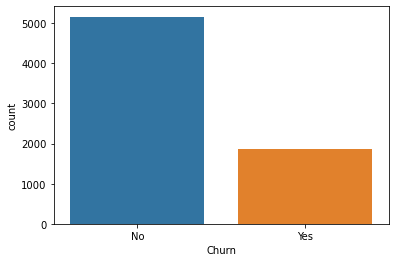

In [587]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

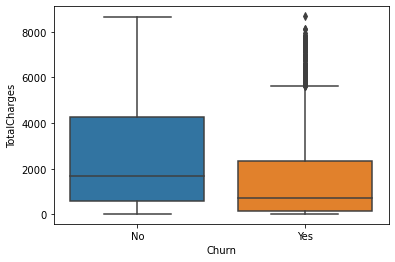

In [588]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

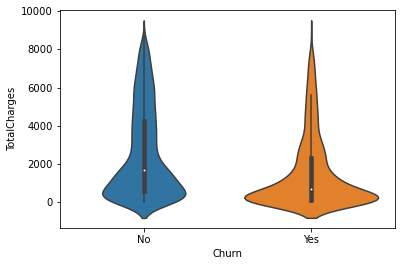

In [589]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

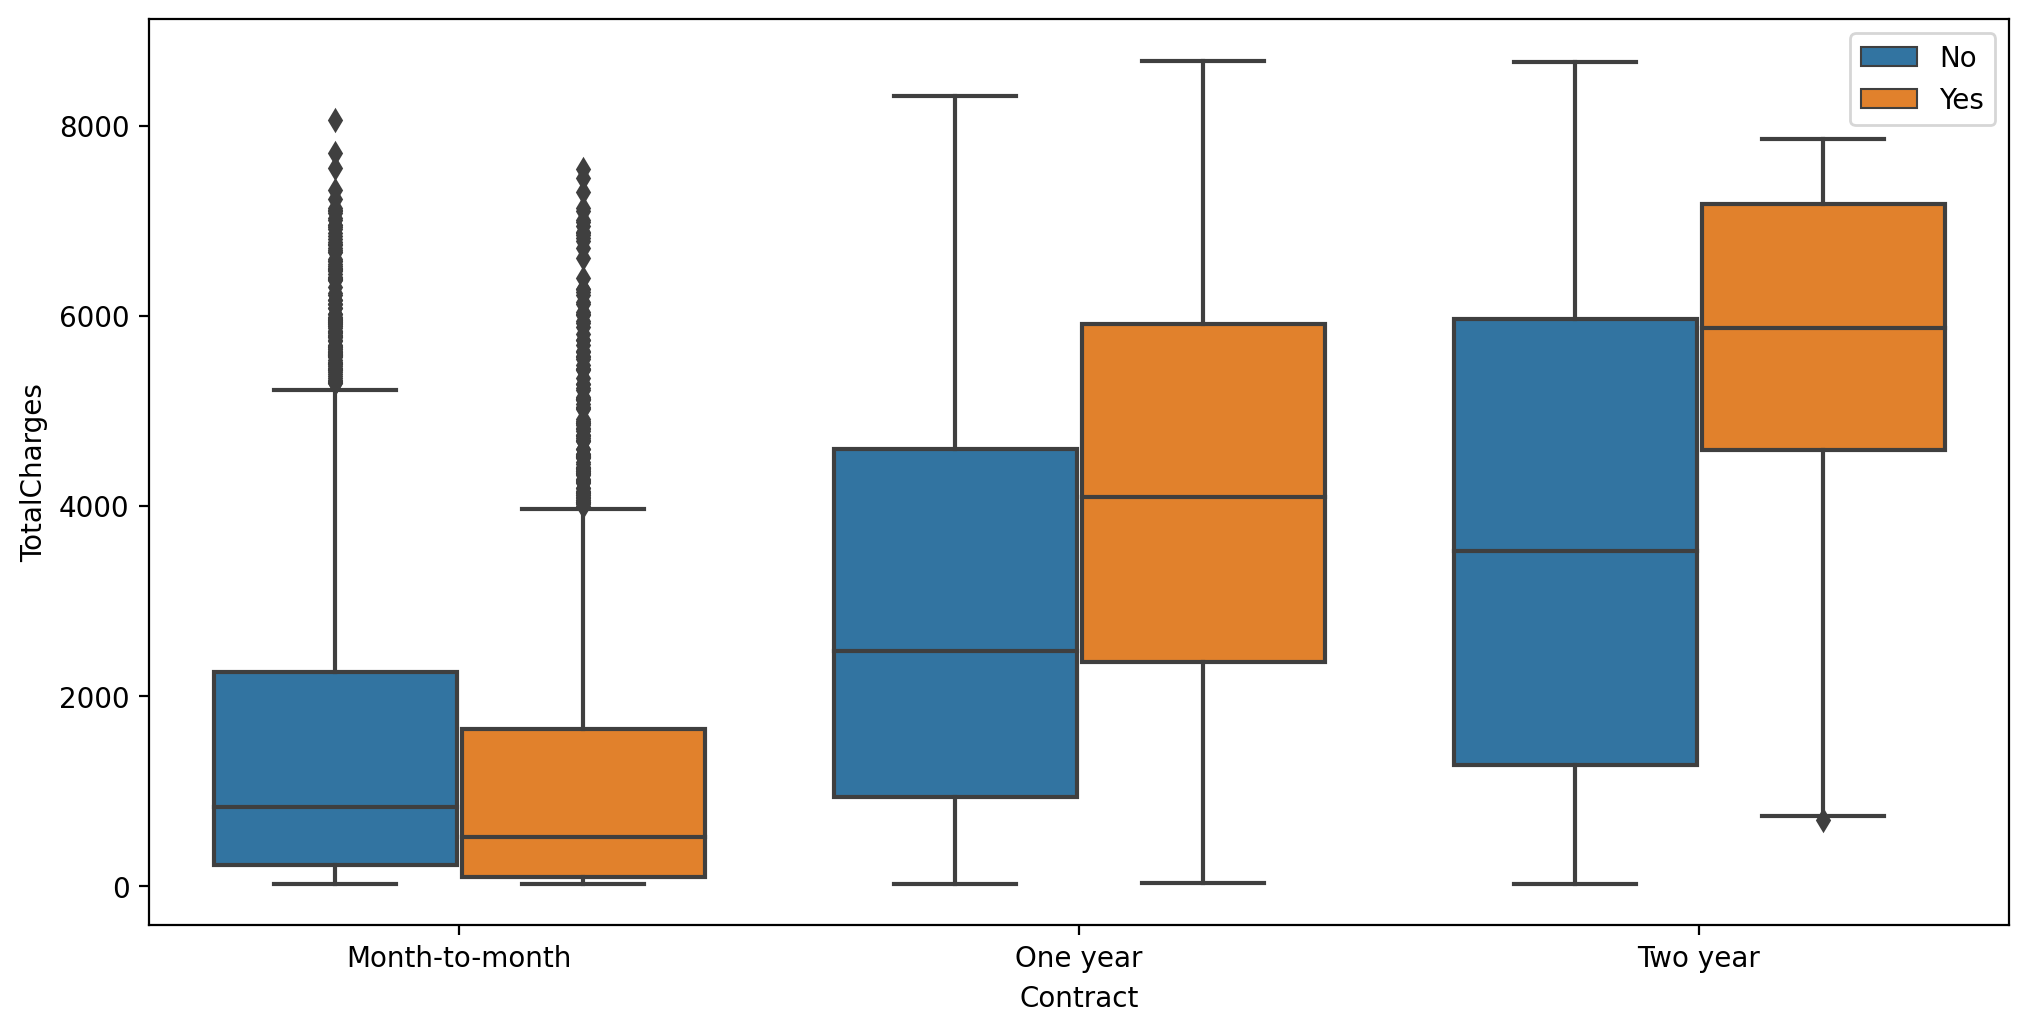

In [590]:
plt.figure(figsize=(12,6), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend( loc = 'upper right')

In [591]:
df_corr = pd.get_dummies(data=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [592]:
df_corr

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [593]:
df_corr['Churn_Yes'].sort_values()[:-1]

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

<AxesSubplot:>

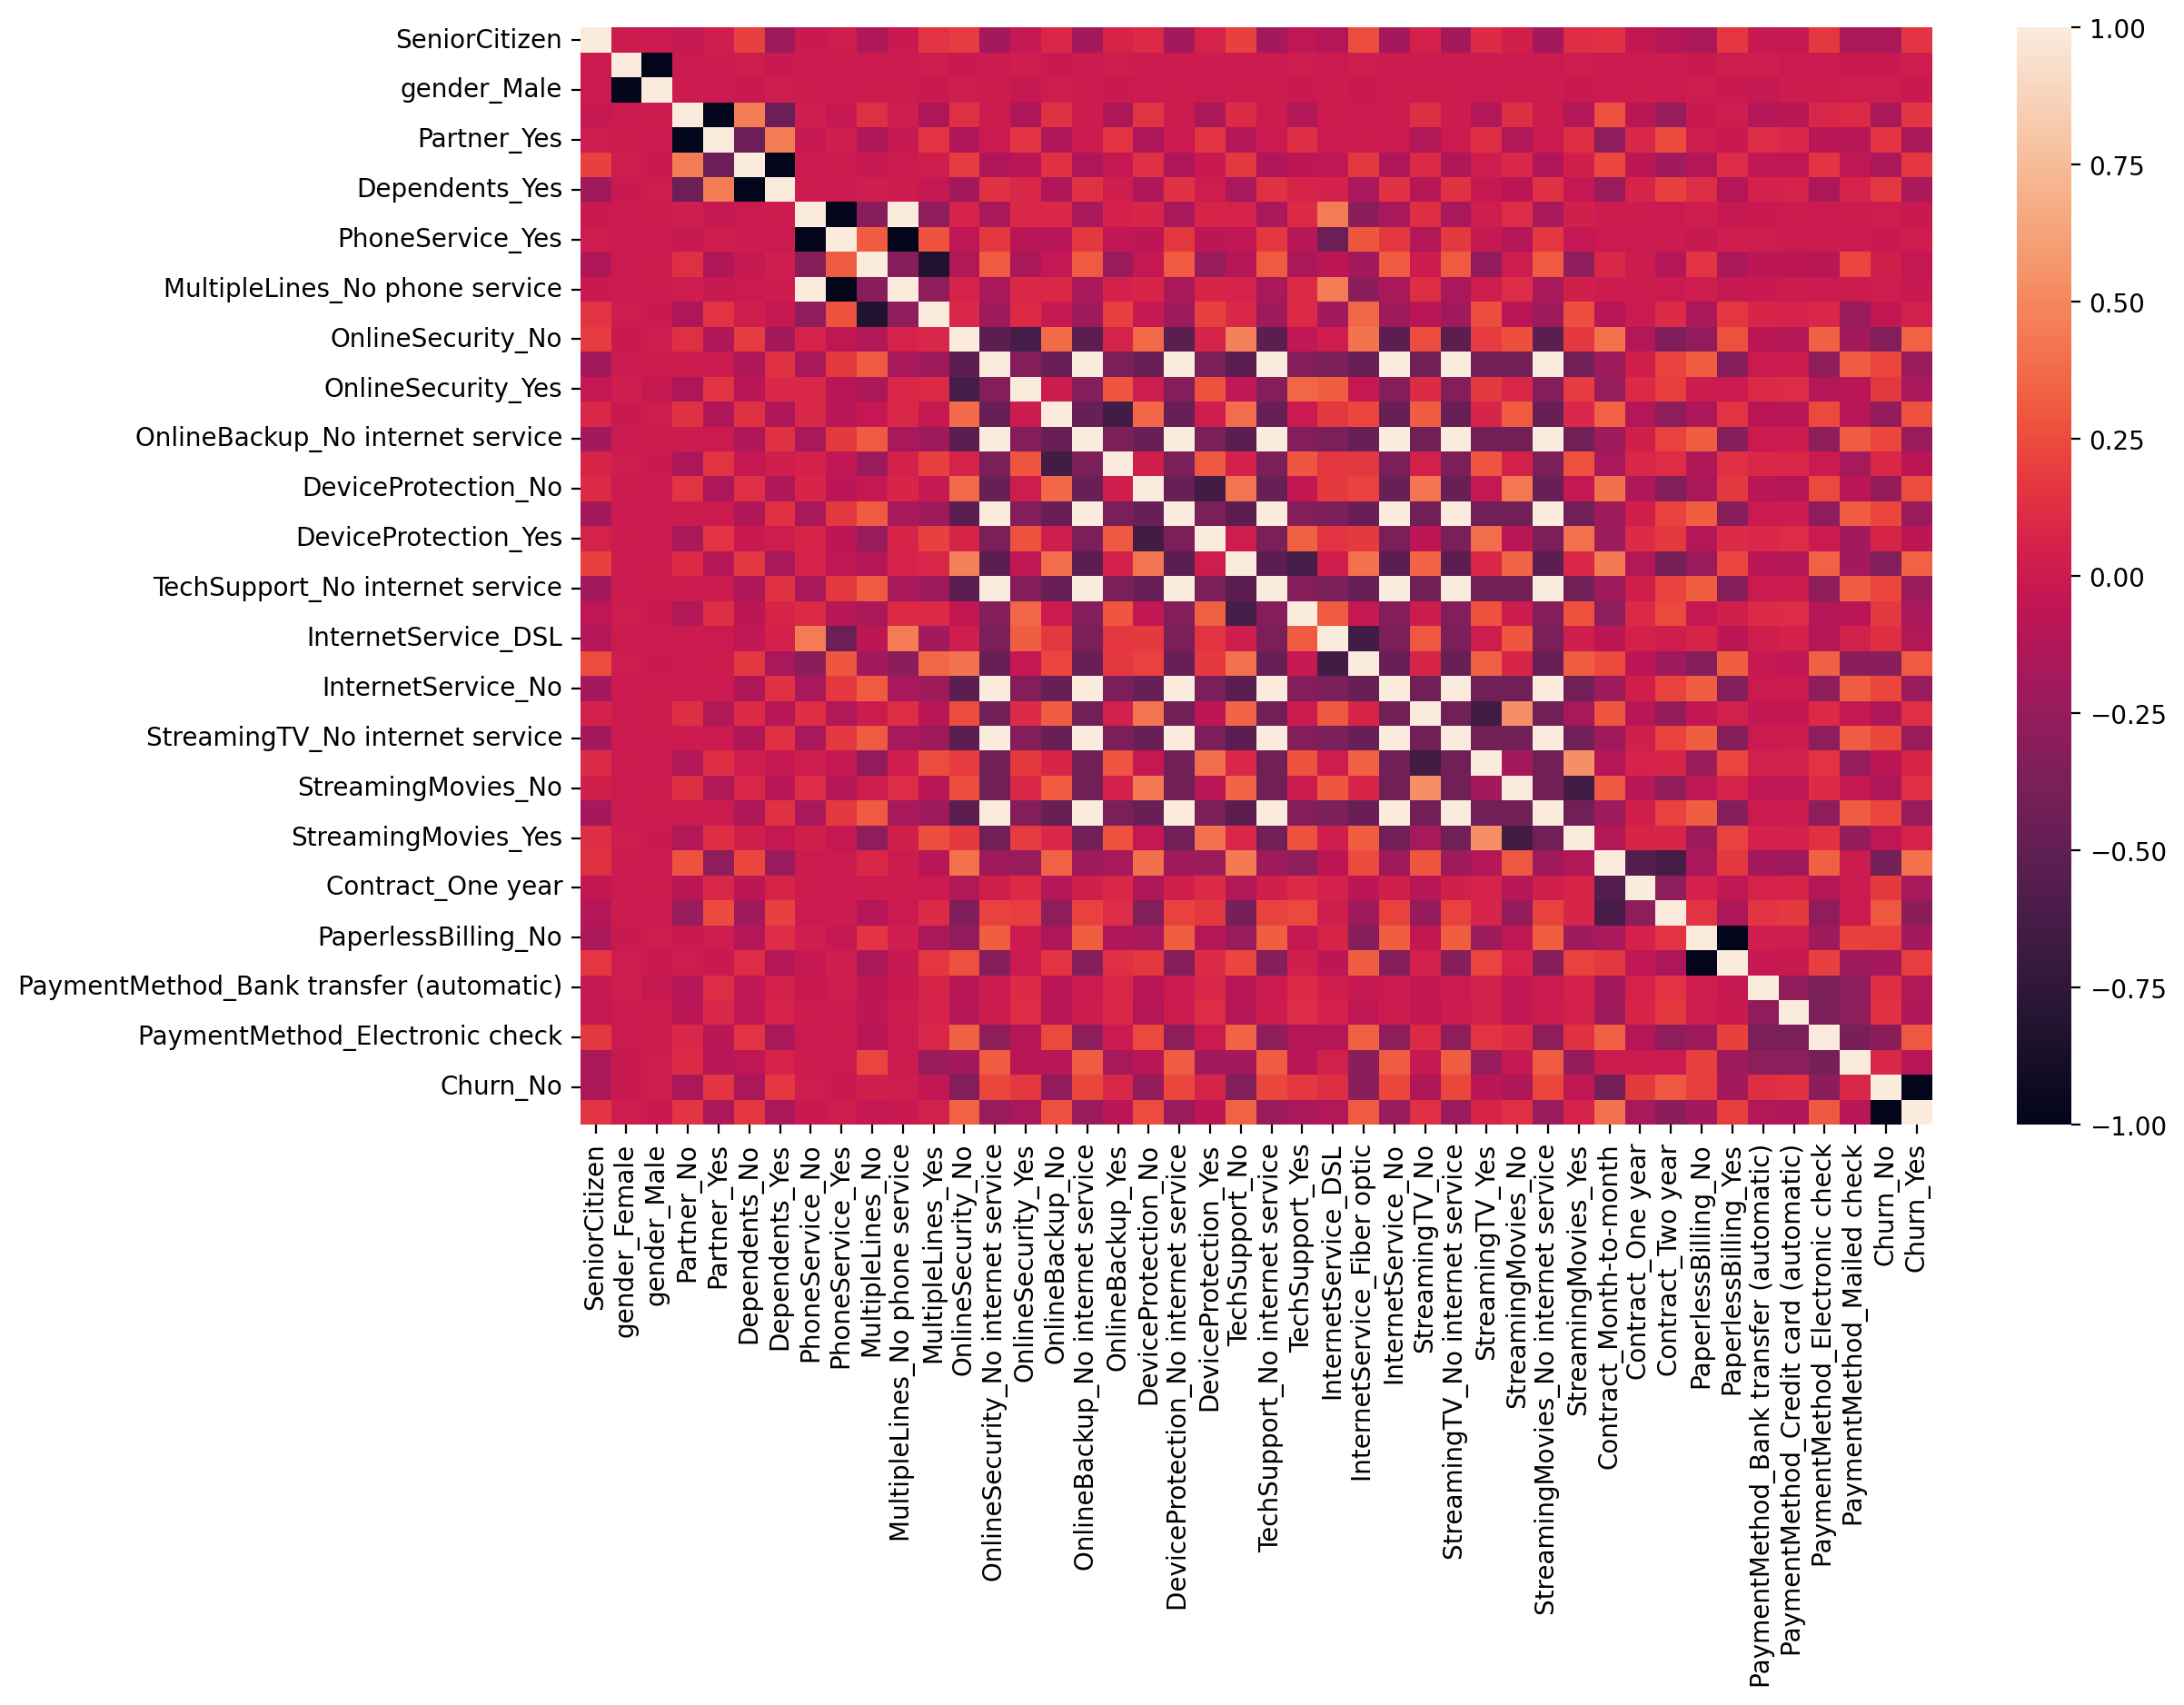

In [594]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df_corr)

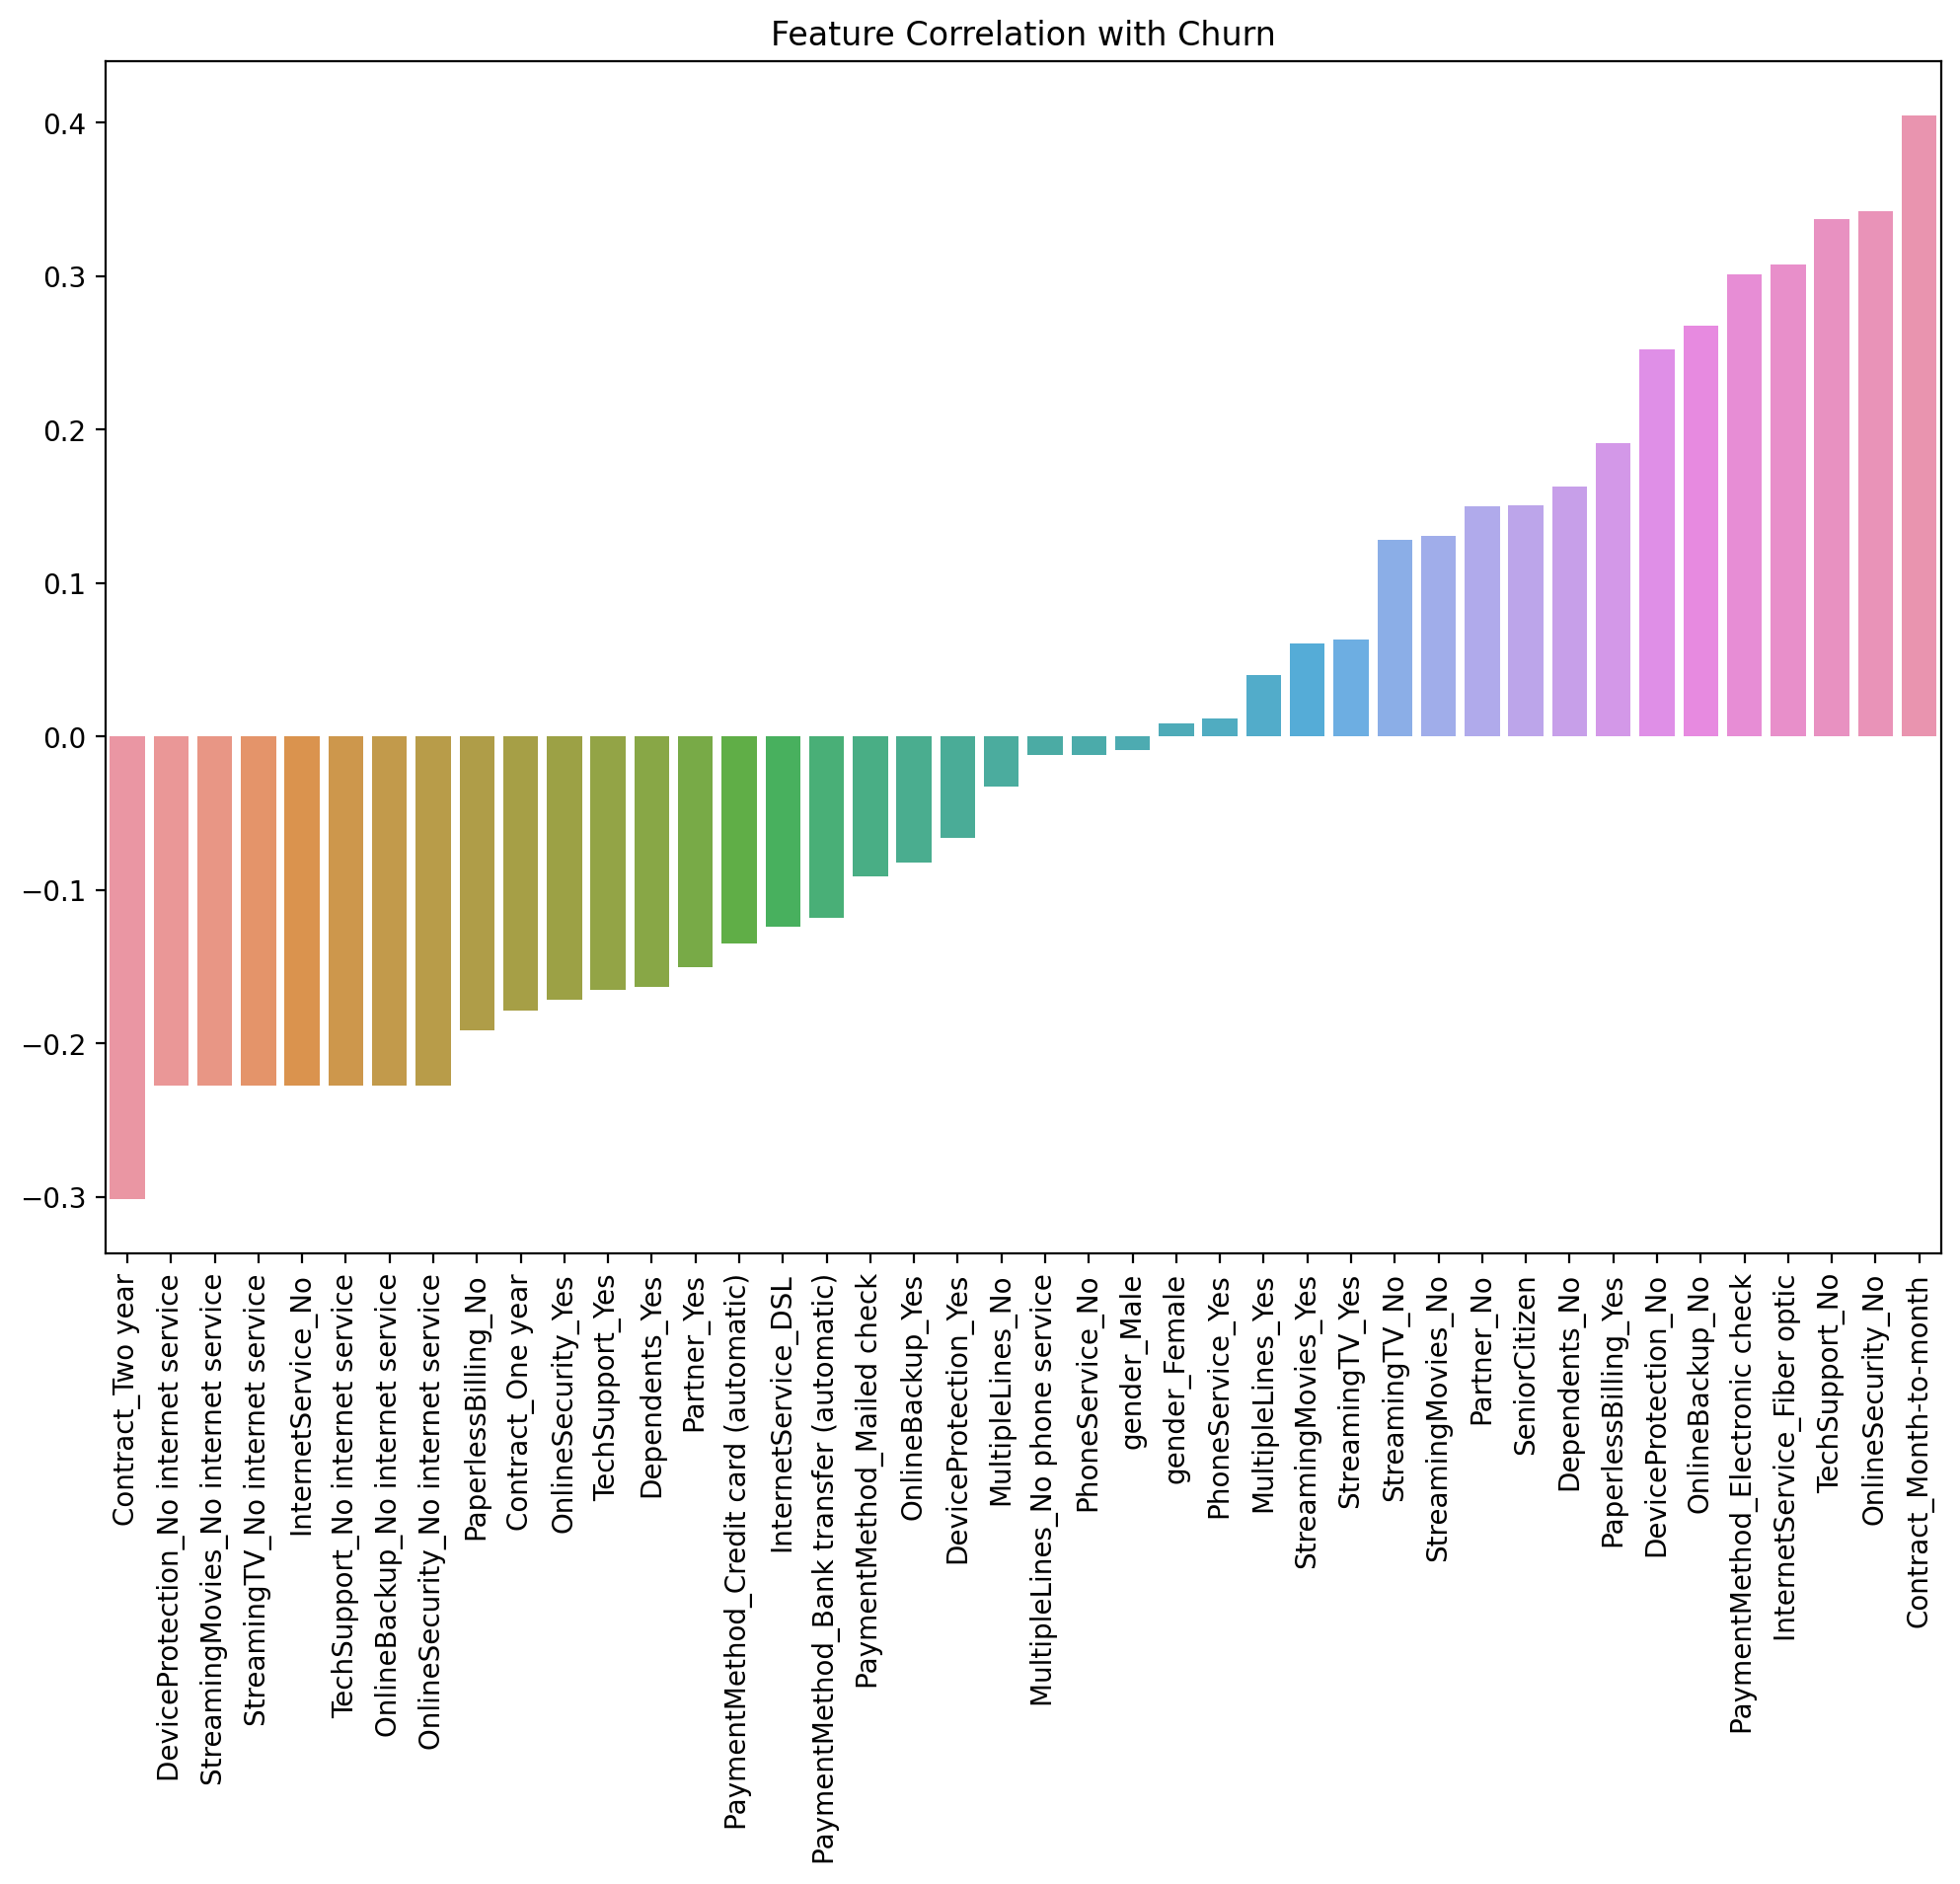

In [595]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index, y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation with Churn')
plt.xticks(rotation=90);

In [596]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

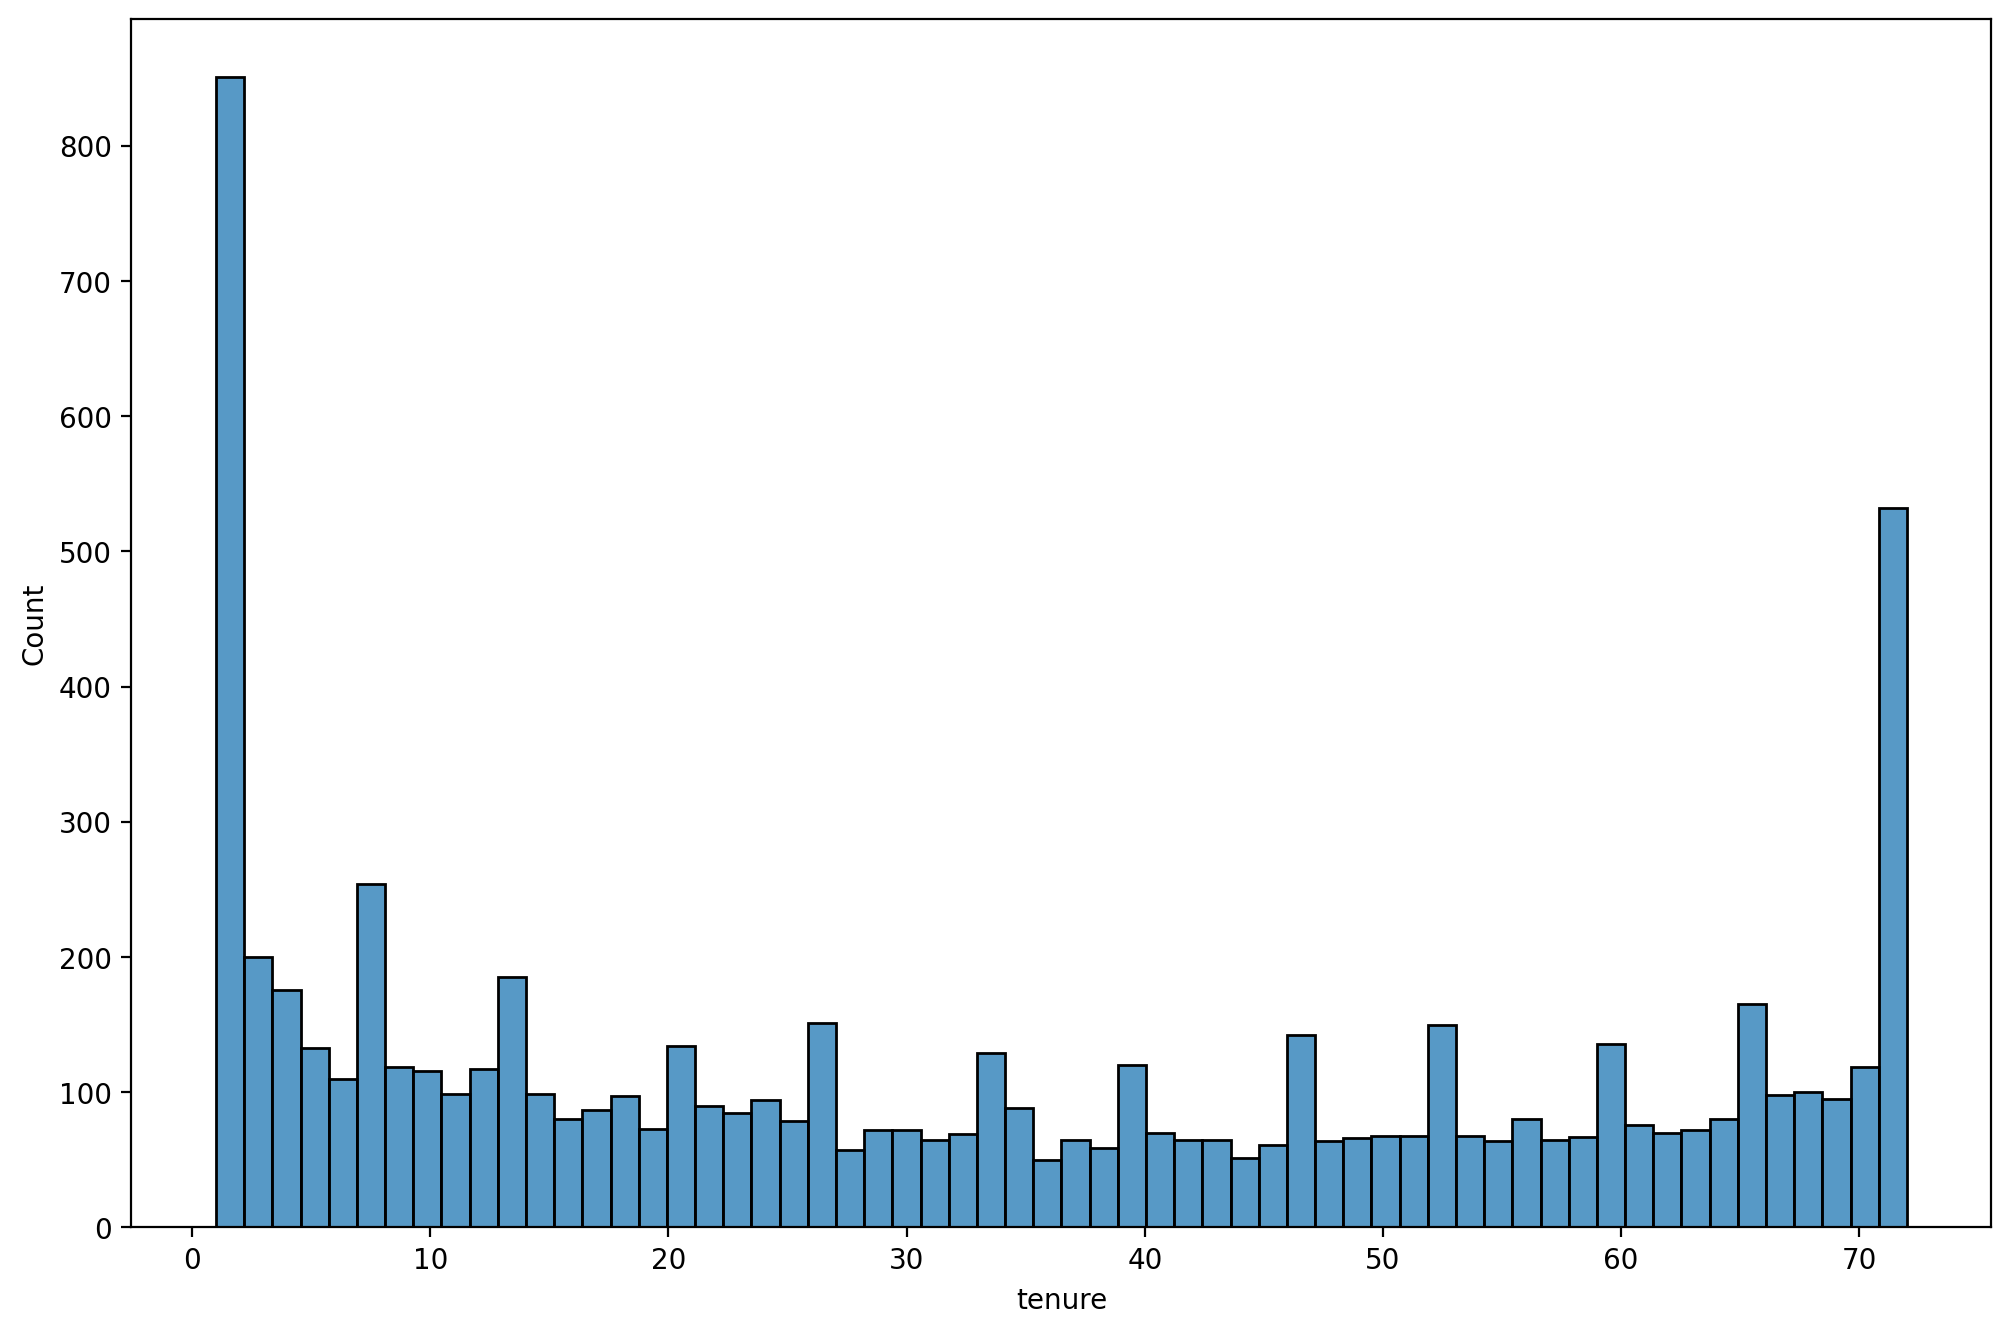

In [597]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(data=df, x='tenure', bins=60)

<Figure size 2400x1600 with 0 Axes>

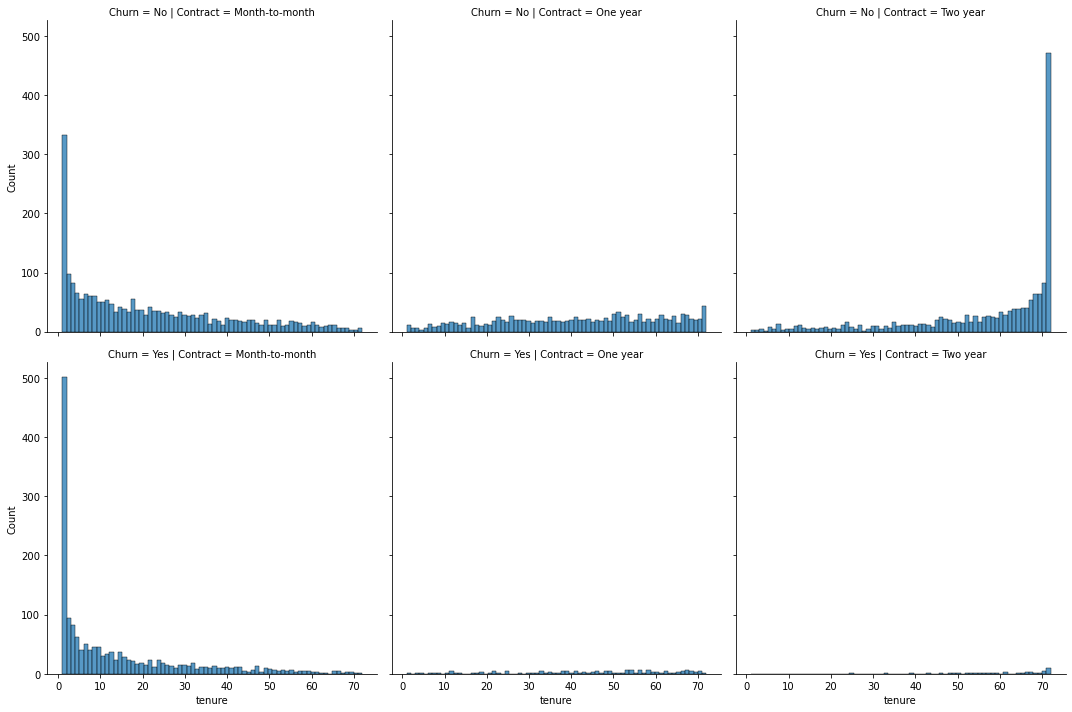

In [598]:
plt.figure(figsize=(12,8), dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

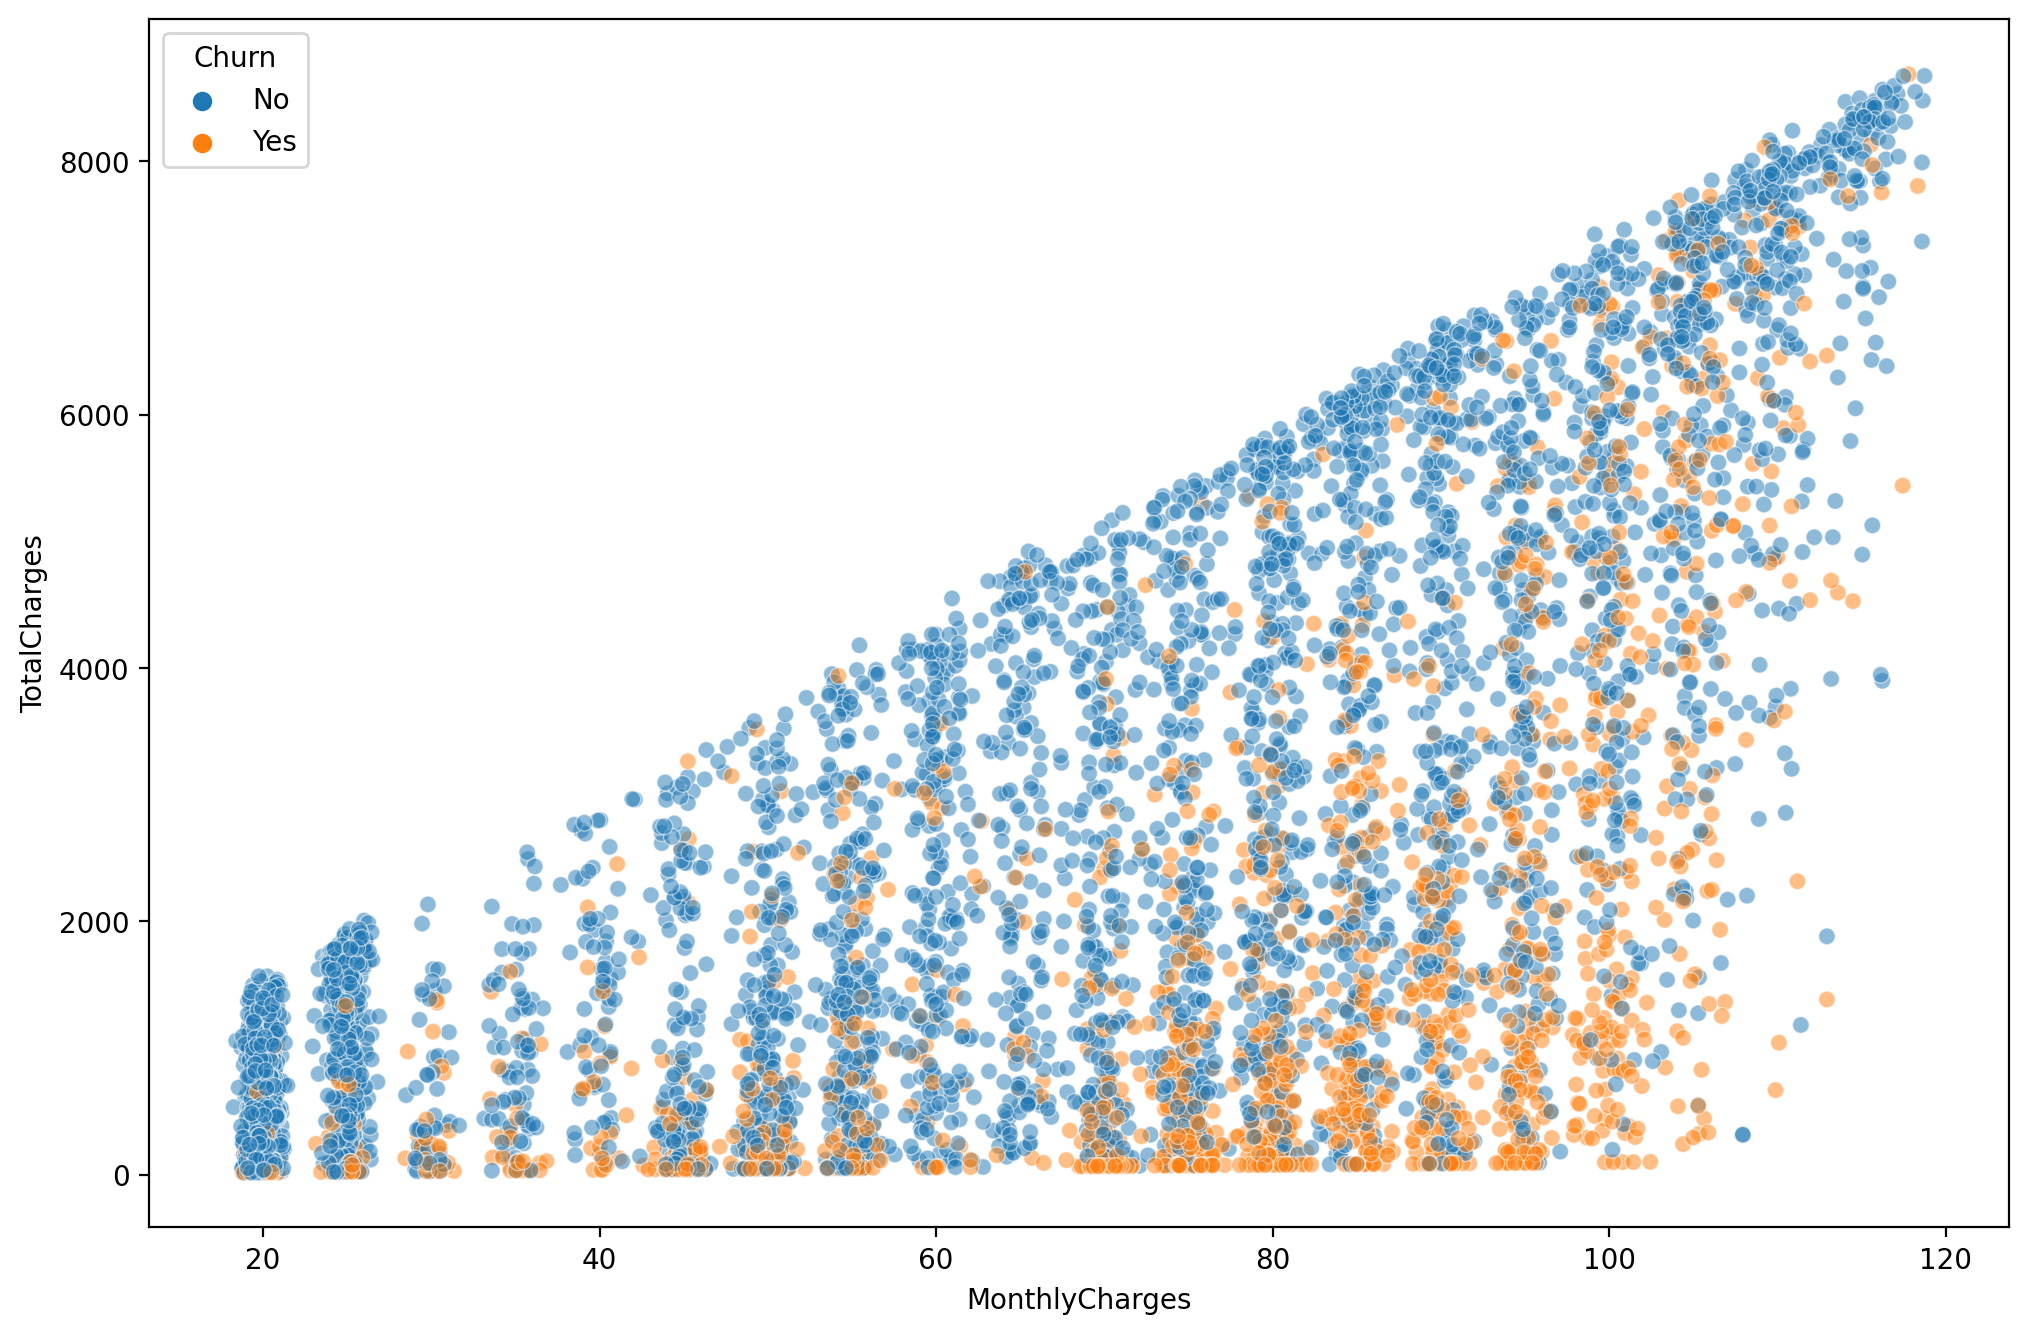

In [599]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', linewidth=0.5, alpha=0.5)

In [600]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [601]:
churn_rate = yes_churn / (yes_churn+no_churn) * 100

In [602]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

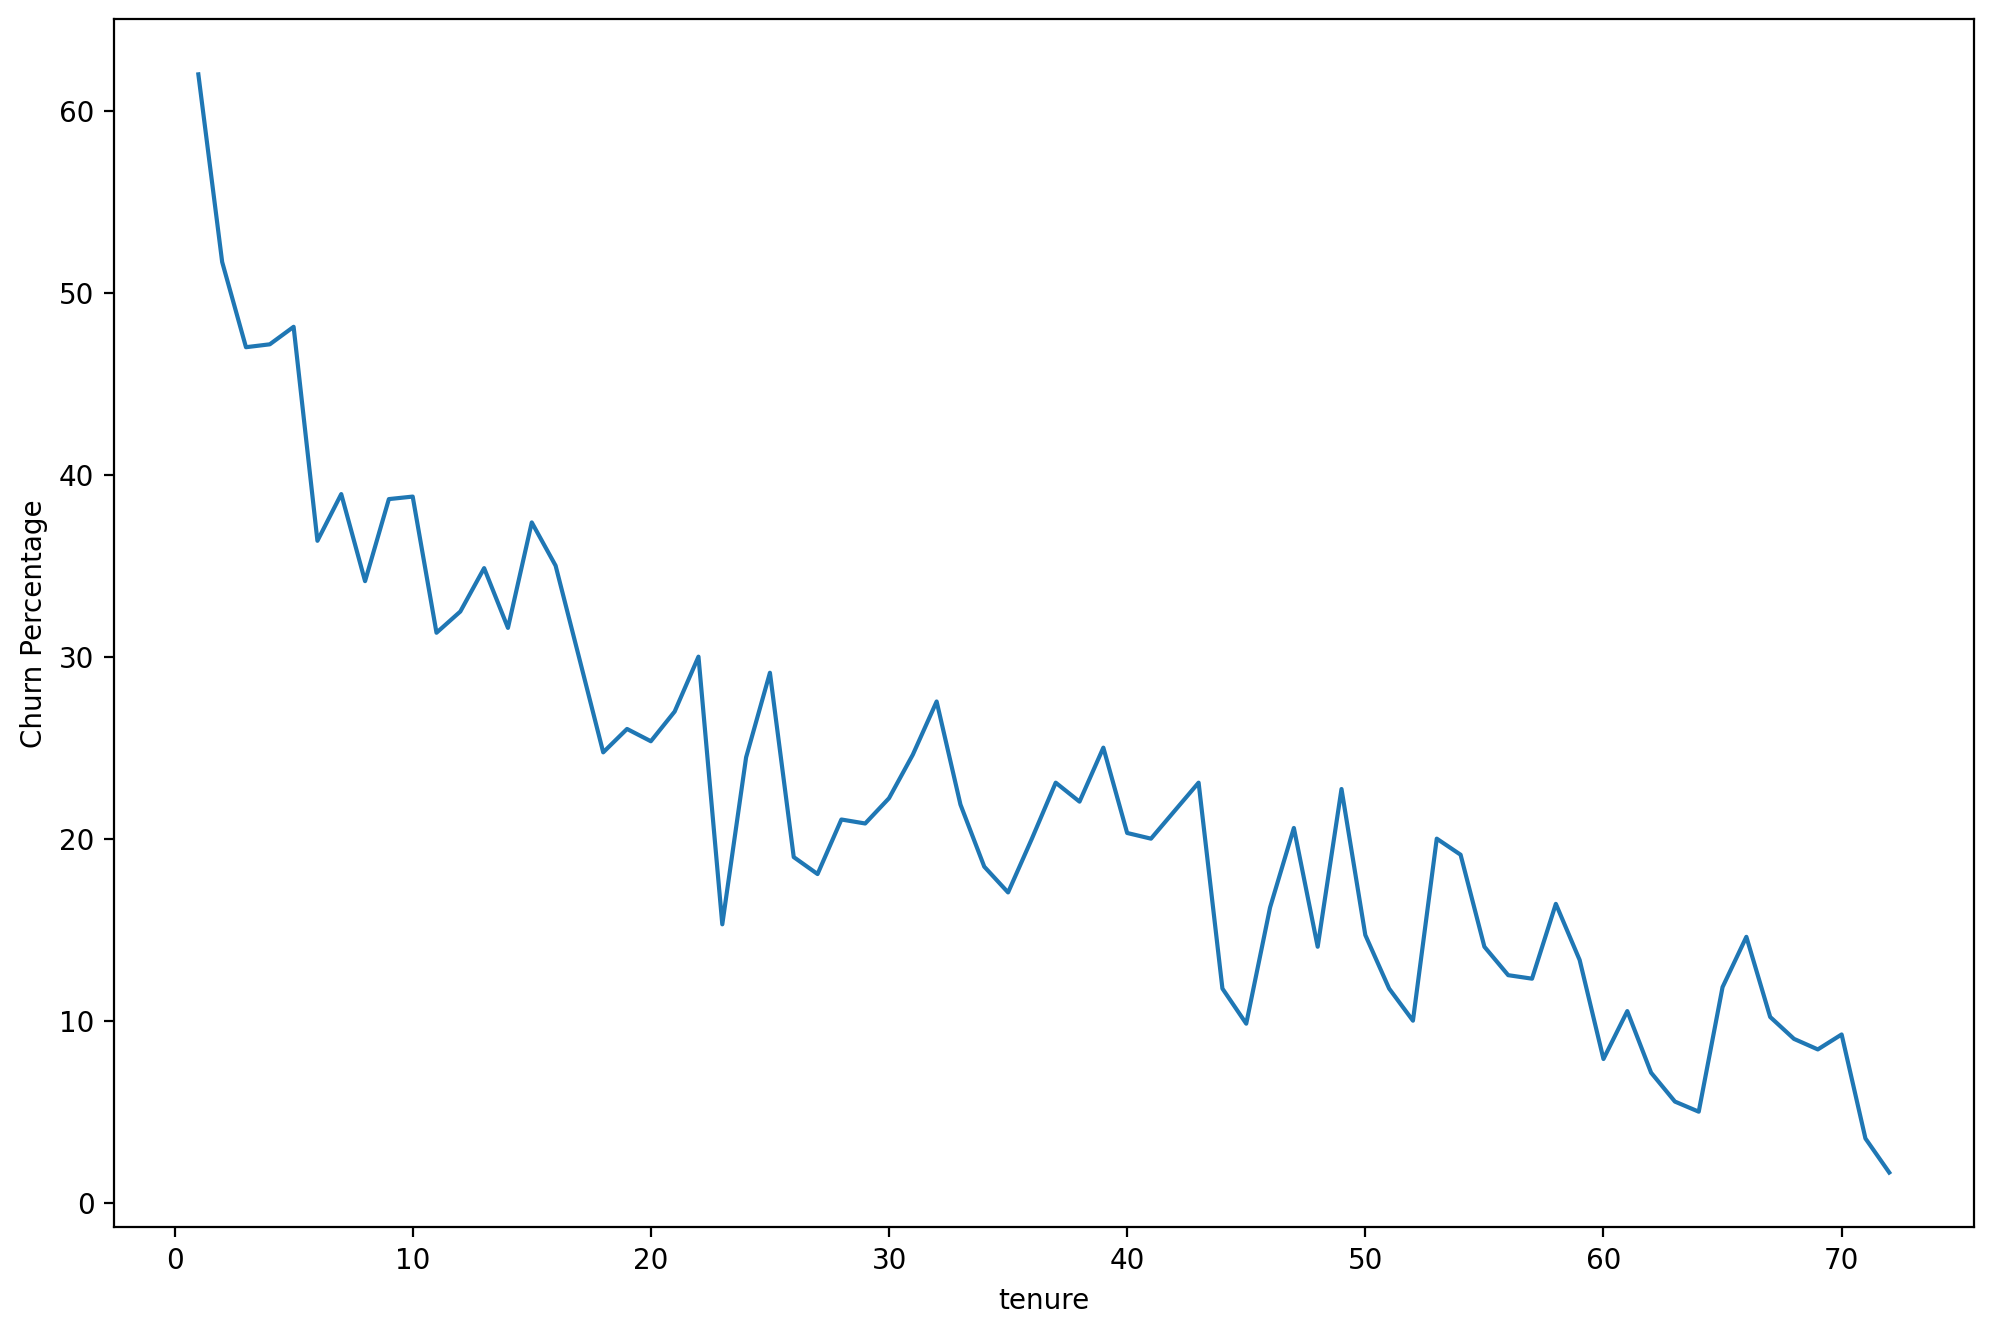

In [603]:
plt.figure(figsize=(12,8), dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [604]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [605]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [606]:
df.head(10)[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

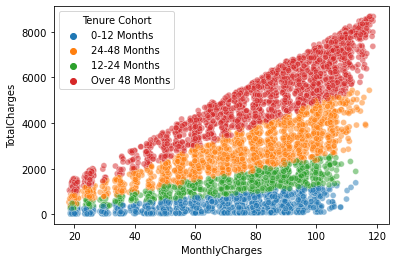

In [607]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', linewidth=0.5, alpha=0.5)

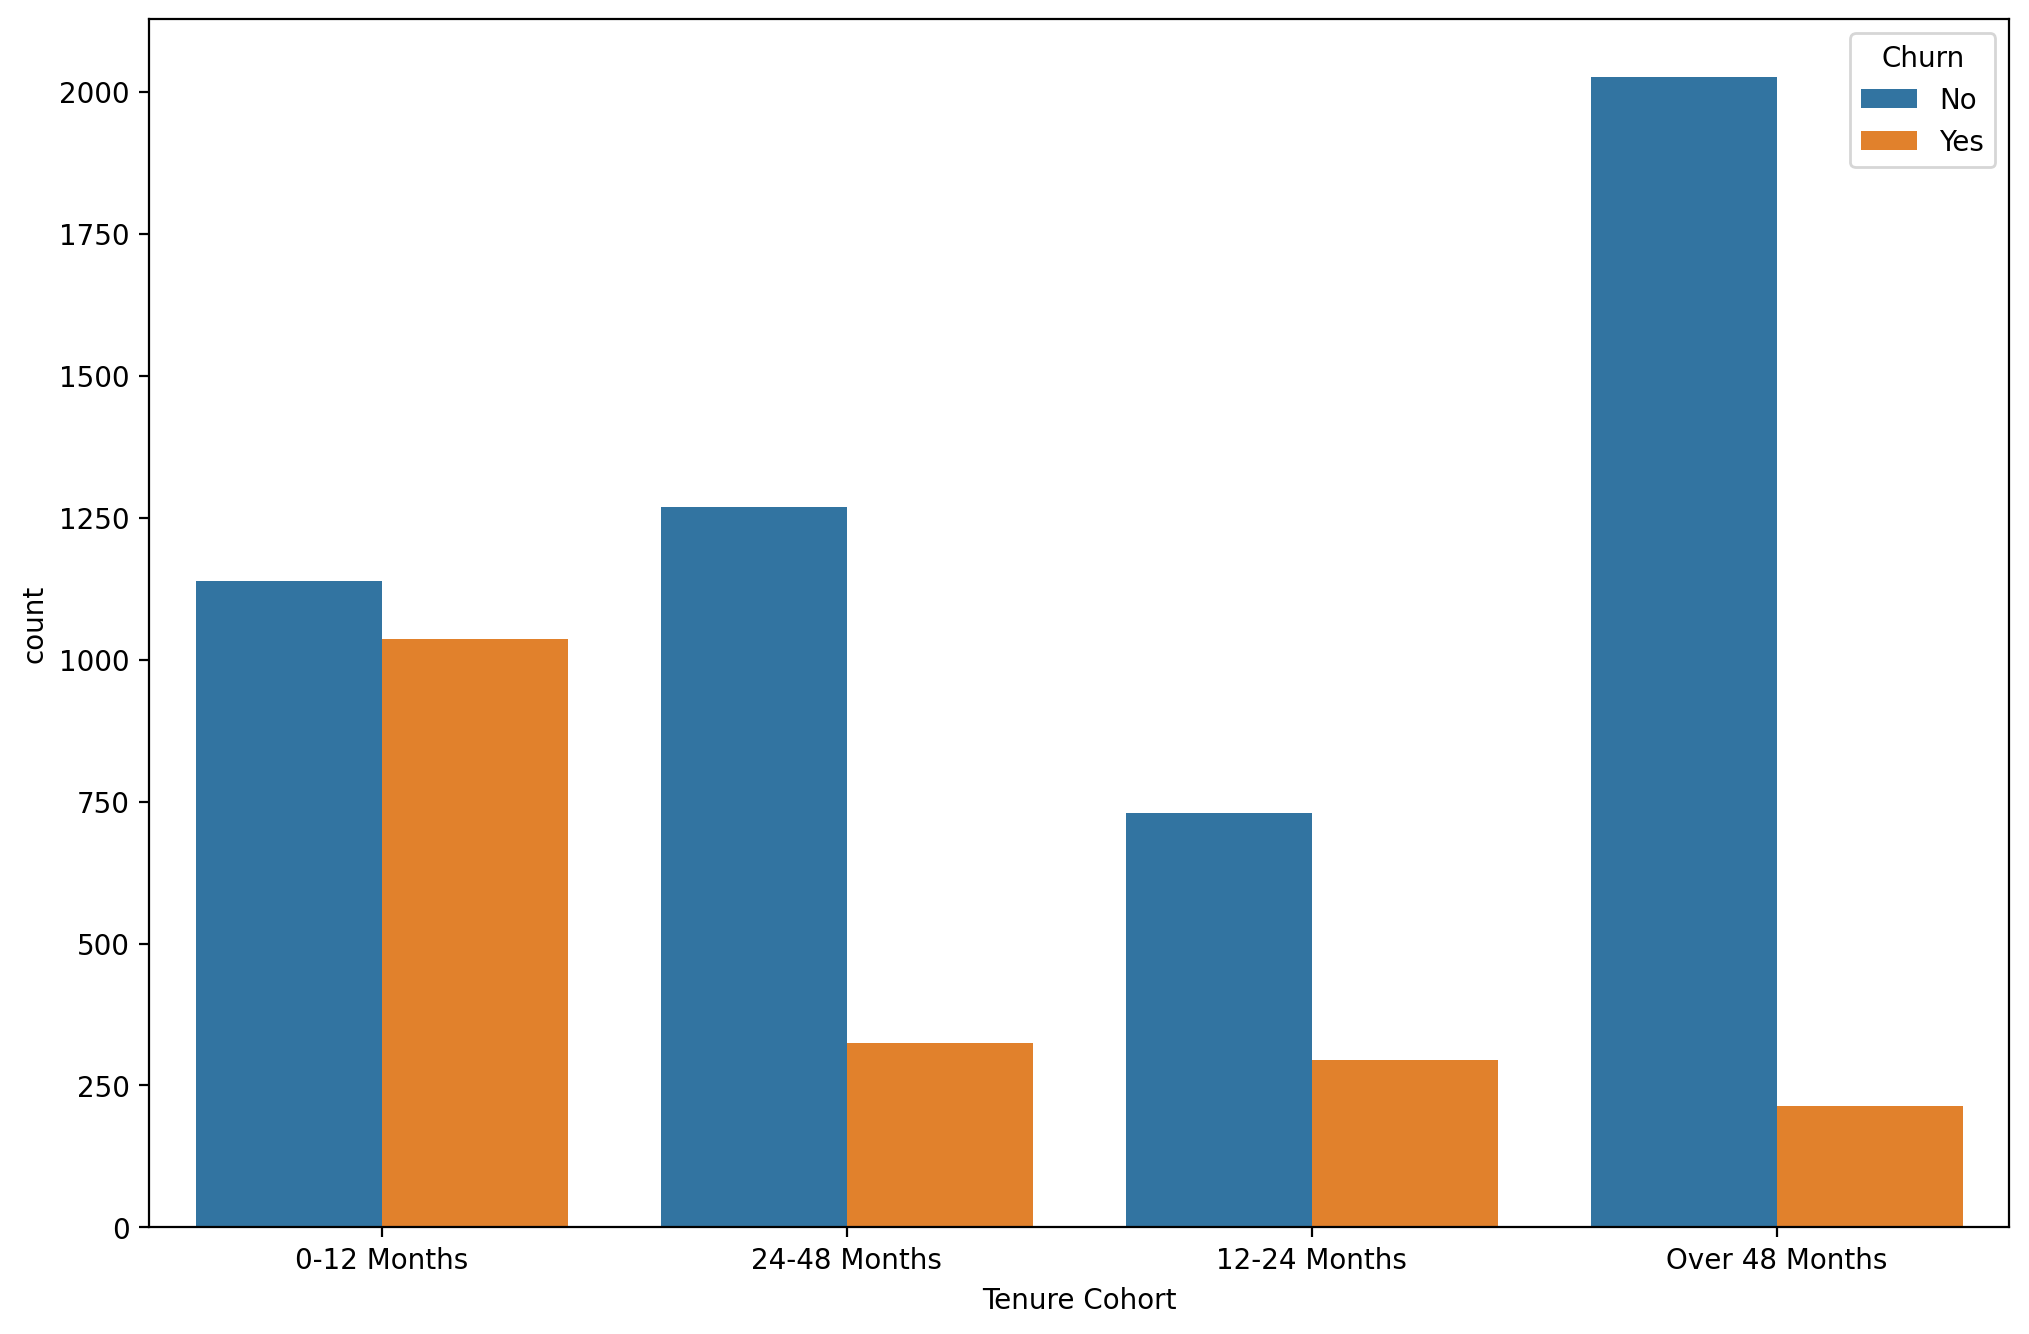

In [608]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

<Figure size 2000x800 with 0 Axes>

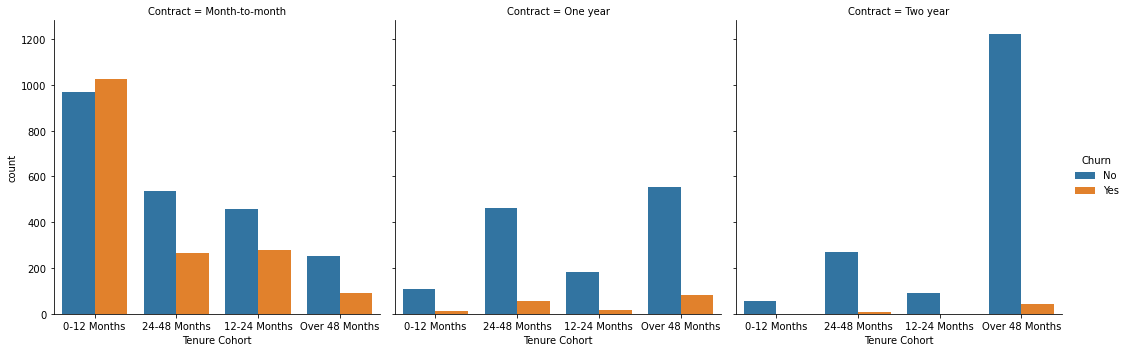

In [609]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

In [610]:
#creating list for gathering data about each model's performance
model_name = []
accuracy_result = []

# DECISION TREE APPLICATION

              precision    recall  f1-score   support

          No       0.89      0.86      0.87       580
         Yes       0.44      0.52      0.47       124

    accuracy                           0.80       704
   macro avg       0.66      0.69      0.67       704
weighted avg       0.81      0.80      0.80       704

Accuracy Score:
0.796875


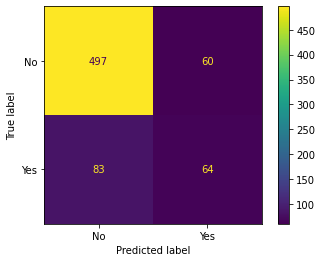

In [611]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#applying the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [3,4,5,6]}
grid_model = GridSearchCV(estimator=estimator, param_grid=param_grid)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)

#checking accuracy and results
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
print(classification_report(predictions, y_test))
print(plot_confusion_matrix(grid_model, X_test, y_test))
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('Basic Decision Tree')

DecisionTreeClassifier(max_depth=5)
[0.00817464 0.45223938 0.02596277 0.04532075 0.         0.
 0.         0.         0.00754192 0.00799877 0.34022334 0.0284796
 0.         0.00567638 0.         0.00578629 0.         0.
 0.         0.00852294 0.         0.         0.         0.
 0.00962181 0.02332128 0.         0.         0.03113012 0.
 0.         0.         0.        ]


Text(0.5, 1.0, 'Important Features in Decision Tree')

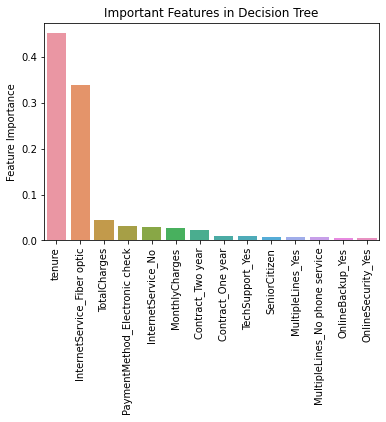

In [612]:
#checking grid_model attributes and gathering important features (non-zero)
print(grid_model.best_estimator_)
print(grid_model.best_estimator_.feature_importances_)
imp_feats = pd.DataFrame(data=grid_model.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')[::-1]
imp_feats = imp_feats[imp_feats['Feature Importance'] > 0]
sns.barplot(data=imp_feats, x=imp_feats.index, y="Feature Importance")
plt.xticks(rotation=90);
plt.title('Important Features in Decision Tree')

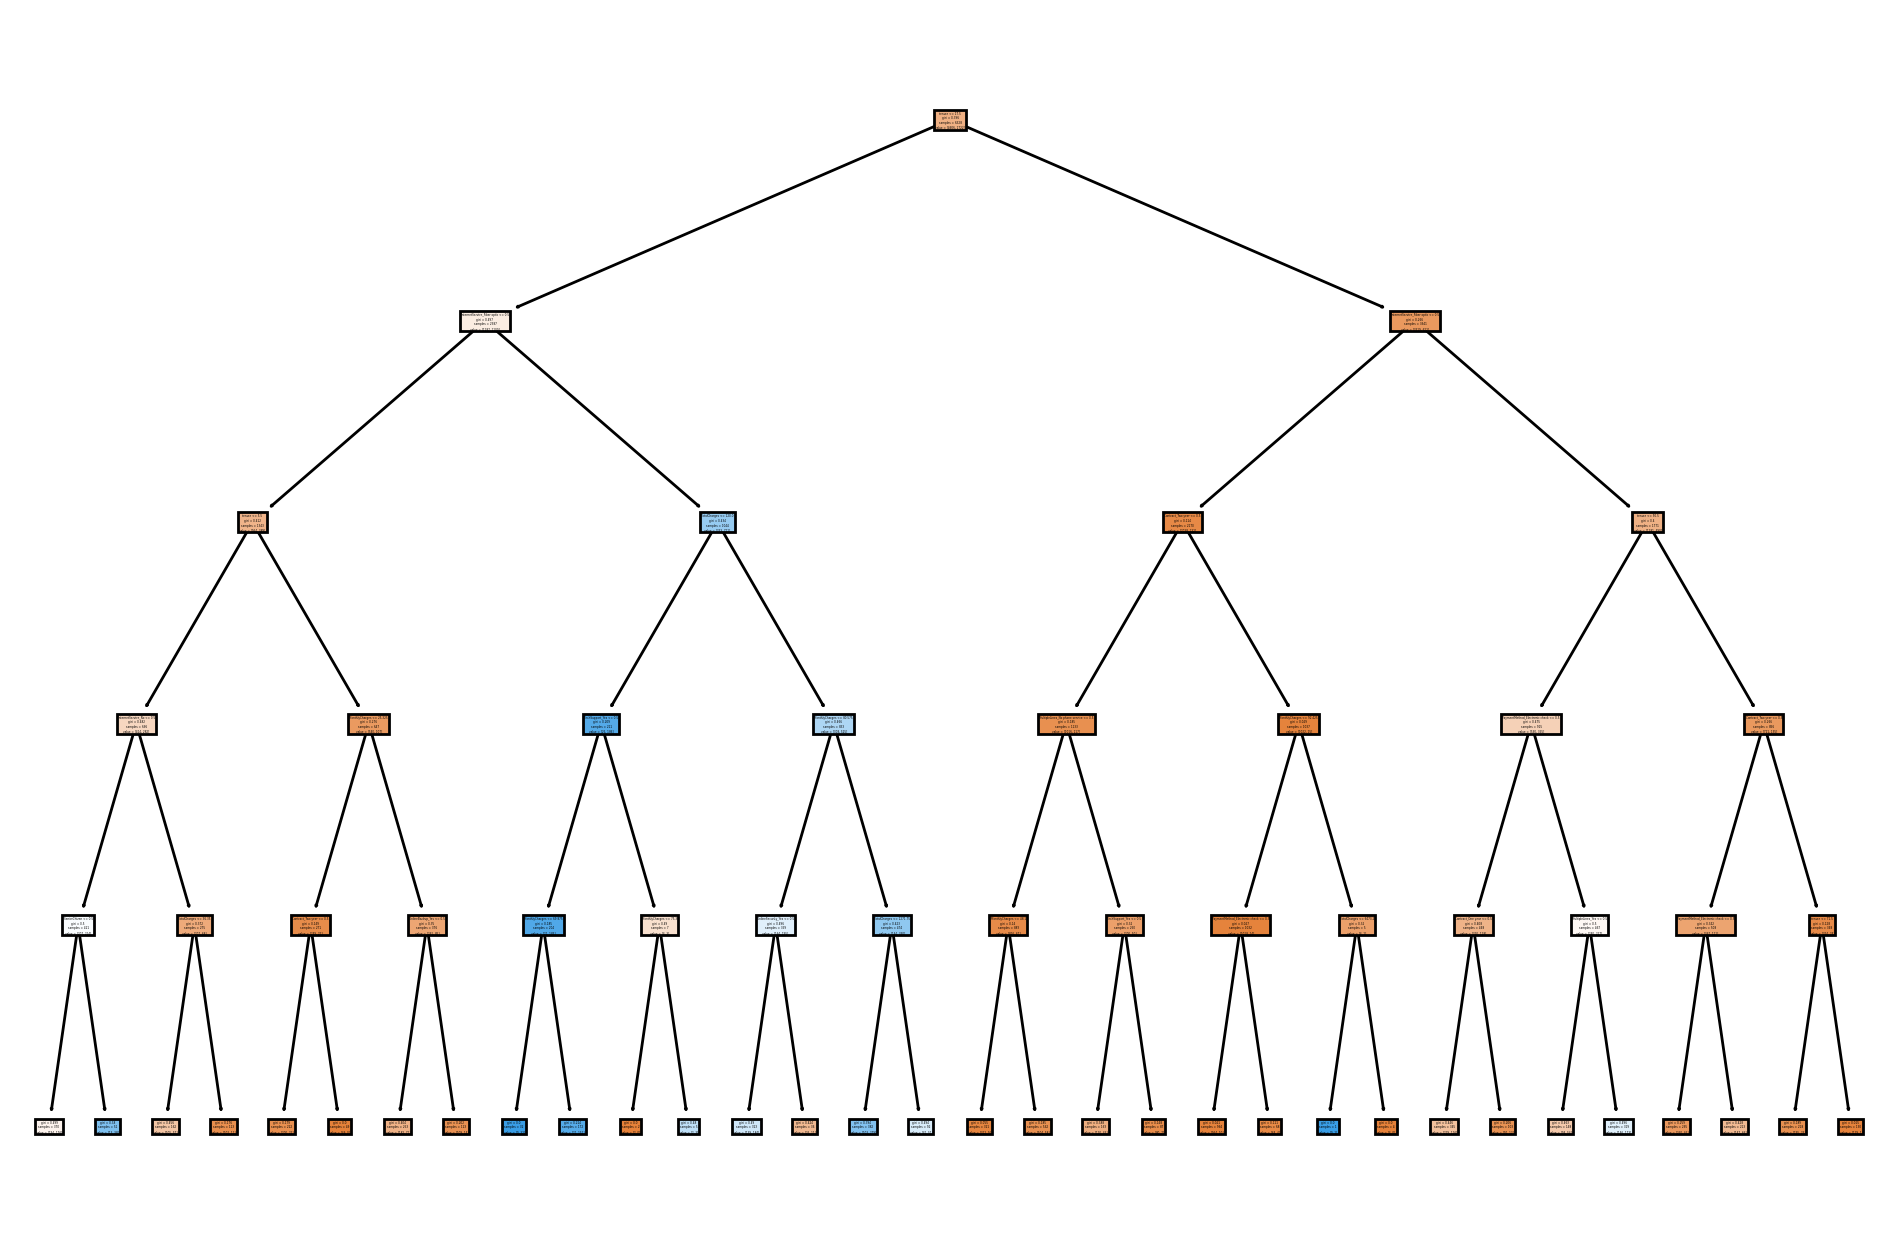

In [613]:
#plotting tree visually
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=200)
plot_tree(grid_model.best_estimator_, filled=True, feature_names=X.columns);

# Logistic Regression Application

In [614]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#scale data properly
from sklearn.preprocessing import StandardScaler
def scaling(X_train, X_test):
    scaler = StandardScaler()
    scaled_X_train = X_train.copy()
    scaled_X_test = X_test.copy()
    scaled_X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
    scaled_X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])
    scaled_X_train = pd.get_dummies(data=X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])
    scaled_X_test = pd.get_dummies(data=X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])
    return (scaled_X_train, scaled_X_test)
scaled_X_train, scaled_X_test = scaling(X_train, X_test)

In [615]:
#applying logistic regression model
from sklearn.linear_model import LogisticRegression
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,5)
C = np.logspace(0,10,5)
param_grid = {'penalty': penalty,
             'l1_ratio':l1_ratio,
             'C':C}
estimator = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)
grid_model = GridSearchCV(estimator=estimator, param_grid=param_grid)
grid_model.fit(scaled_X_train, y_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abhin\anaconda3\lib\sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

{'C': 1.0, 'l1_ratio': 0.25, 'penalty': 'elasticnet'}
              precision    recall  f1-score   support

          No       0.89      0.85      0.87      1394
         Yes       0.51      0.60      0.55       364

    accuracy                           0.80      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.81      0.80      0.80      1758

Accuracy Score:
0.7969283276450512


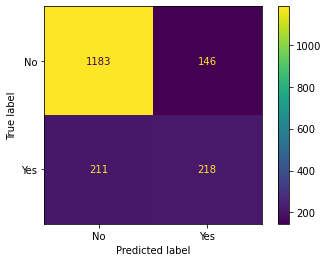

In [616]:
#understanding best model and predicting
print(grid_model.best_params_)
predictions = grid_model.predict(scaled_X_test)
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
print(classification_report(predictions, y_test))
print(plot_confusion_matrix(grid_model, scaled_X_test, y_test))
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('Logistic Regression')

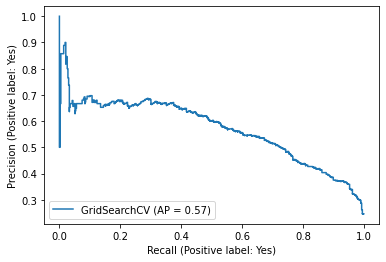

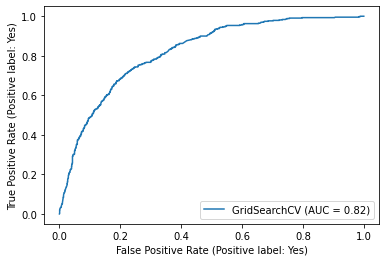

In [617]:
#graphing roc, precision, and recall
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
plot_precision_recall_curve(grid_model, scaled_X_test, y_test)
#heavy class imbalance so precision recall curve is more meaningful
plot_roc_curve(grid_model, scaled_X_test, y_test)

# KNN Classification Application

In [618]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#use scaled data method from logistic regression model
scaled_X_train, scaled_X_test = scaling(X_train, X_test)

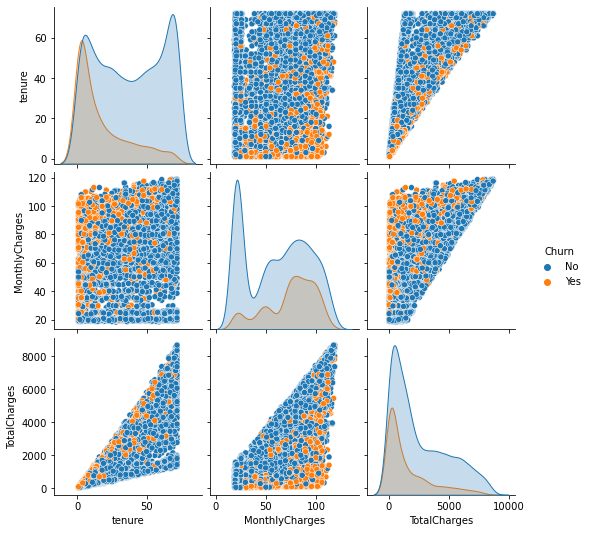

In [619]:
#identifying continuous variable densities (not very separate)
sns.pairplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

Text(0.5, 0, 'Number of Neighbors')

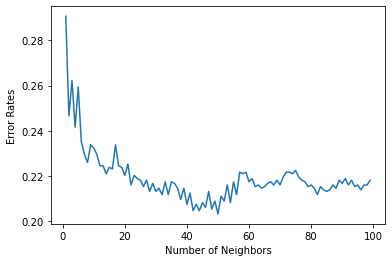

In [620]:
#identifying the best n_neighbors parameter for knn_model
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train, y_train)
    predictions = model.predict(scaled_X_test)
    error_rates.append(1-accuracy_score(predictions, y_test))
plt.plot(range(1,100), error_rates)
plt.ylabel('Error Rates')
plt.xlabel('Number of Neighbors')
#best fit around range of n_neighbors: 45-50

Accuracy Score:
0.7967306325515281
              precision    recall  f1-score   support

          No       0.88      0.85      0.87      1082
         Yes       0.55      0.61      0.58       325

    accuracy                           0.80      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.80      0.80      0.80      1407



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 50,
 'p': 2,
 'weights': 'uniform'}

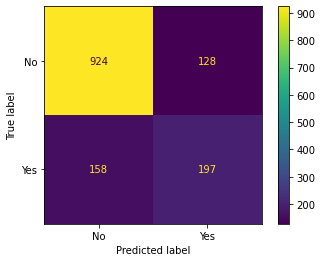

In [621]:
#applying final knn and showing results
final_knn = KNeighborsClassifier(n_neighbors=50)
final_knn.fit(scaled_X_train, y_train)
predictions = final_knn.predict(scaled_X_test)
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))
print(classification_report(predictions, y_test))
plot_confusion_matrix(final_knn, scaled_X_test, y_test)

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('K-Nearest-Neighbors')
final_knn.get_params()

# Support Vector Classifier Application

In [622]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#use scaled data method from logistic regression model
scaled_X_train, scaled_X_test = scaling(X_train, X_test)

In [623]:
#creating grid search for hyperparameters of svc
from sklearn.svm import SVC
param_grid = {'C': [0.001, .01, .1, .3, .5, .7, .9, .95, .99],
             'kernel': ['poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'degree': [3,4,5,6]}
estimator = SVC()
grid_model = GridSearchCV(estimator=estimator, param_grid=param_grid)
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95,
                               0.99],
                         'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [624]:
#predicting and recording results
grid_model.best_estimator_.get_params()

{'C': 0.7,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Accuracy Score:
0.7926136363636364
              precision    recall  f1-score   support

          No       0.87      0.87      0.87       557
         Yes       0.50      0.50      0.50       147

    accuracy                           0.79       704
   macro avg       0.69      0.69      0.69       704
weighted avg       0.79      0.79      0.79       704



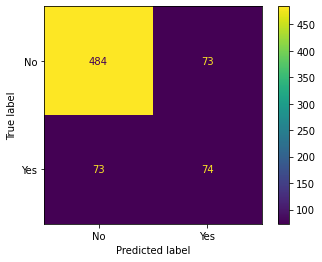

In [625]:
predictions = grid_model.predict(scaled_X_test)
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))
print(classification_report(predictions, y_test))
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('SVC')

# Random Forest Application

In [626]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
#scaling not needed but need to get dummy variables
converted_X_train, converted_X_test = scaling(X_train, X_test)

In [627]:
#applying random forest in grid search
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
param_grid = {'n_estimators': [32, 64, 80, 96, 112, 128],
             'criterion': ['gini', 'entropy'],
             'bootstrap': [True, False],
             'oob_score': [True, False]}
grid_model = GridSearchCV(estimator=estimator, param_grid=param_grid)
grid_model.fit(converted_X_train, y_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.75158246 0.75442644 0.75616445 0.7523721  0.7563228  0.75442706
 0.75173869 0.75600684 0.75679648 0.75553254 0.75458479 0.75616507
 0.75553141 0.75079195 0.75458442 0.75648065 0.75395251 0.75758737
 0.75727092 0.75616532 0.75774485 0.75363668 0.75221388 0.75790245
        nan 0.74858101        nan 0.74984396        nan 0.74984446
        nan 0.7492128         nan 0.74937015        nan 0.74794835
        nan 0.746842          nan 0.74810658        nan 0.74842166
        nan 0.74937002        nan 0.74731594        nan 0.7481072 ]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [32, 64, 80, 96, 112, 128],
                         'oob_score': [True, False]})

In [628]:
grid_model.best_estimator_.get_params()
#oob score not always reported true but bootstrap is true, so I will reset with a final model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 128,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Accuracy Score:
0.7599431818181818
              precision    recall  f1-score   support

          No       0.85      0.85      0.85       554
         Yes       0.44      0.43      0.43       150

    accuracy                           0.76       704
   macro avg       0.64      0.64      0.64       704
weighted avg       0.76      0.76      0.76       704



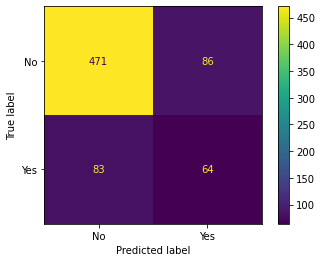

In [629]:
#final predictions and results for random forest
final_random_forest = RandomForestClassifier(n_estimators=64, criterion='entropy', bootstrap=True, oob_score=True)
final_random_forest.fit(converted_X_train, y_train)
predictions = final_random_forest.predict(converted_X_test)
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))
print(classification_report(predictions, y_test))
plot_confusion_matrix(final_random_forest, converted_X_test, y_test)

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('Random Forest')

In [630]:
final_random_forest.oob_score_

0.7504740834386852

# AdaBoost Tree Application

In [631]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
#scaling not needed but need to get dummy variables
converted_X_train, converted_X_test = scaling(X_train, X_test)

Text(0.5, 0, 'Number of Estimators')

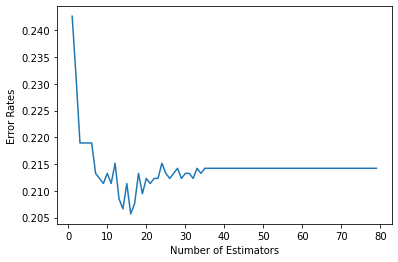

In [632]:
#trying different adaboost tree estimator counts
from sklearn.ensemble import AdaBoostClassifier
error_rates = []
for i in range(1,80):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(converted_X_train, y_train)
    predictions = model.predict(converted_X_test)
    error_rates.append(1-accuracy_score(predictions, y_test))
plt.plot(range(1,80), error_rates)
plt.ylabel('Error Rates')
plt.xlabel('Number of Estimators')
#efficient fit around 30-40 estimators

Accuracy Score:
0.785781990521327
              precision    recall  f1-score   support

          No       0.88      0.85      0.86       827
         Yes       0.50      0.57      0.53       228

    accuracy                           0.79      1055
   macro avg       0.69      0.71      0.70      1055
weighted avg       0.80      0.79      0.79      1055



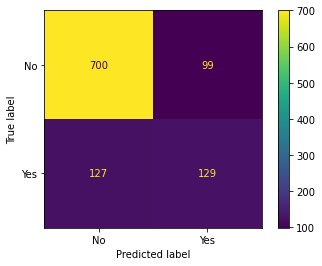

In [633]:
#finalizing last model
ada_boost_final = AdaBoostClassifier(n_estimators=35)
ada_boost_final.fit(converted_X_train, y_train)
predictions = ada_boost_final.predict(converted_X_test)
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))
print(classification_report(predictions, y_test))
plot_confusion_matrix(ada_boost_final, converted_X_test, y_test)

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('AdaBoost Model')

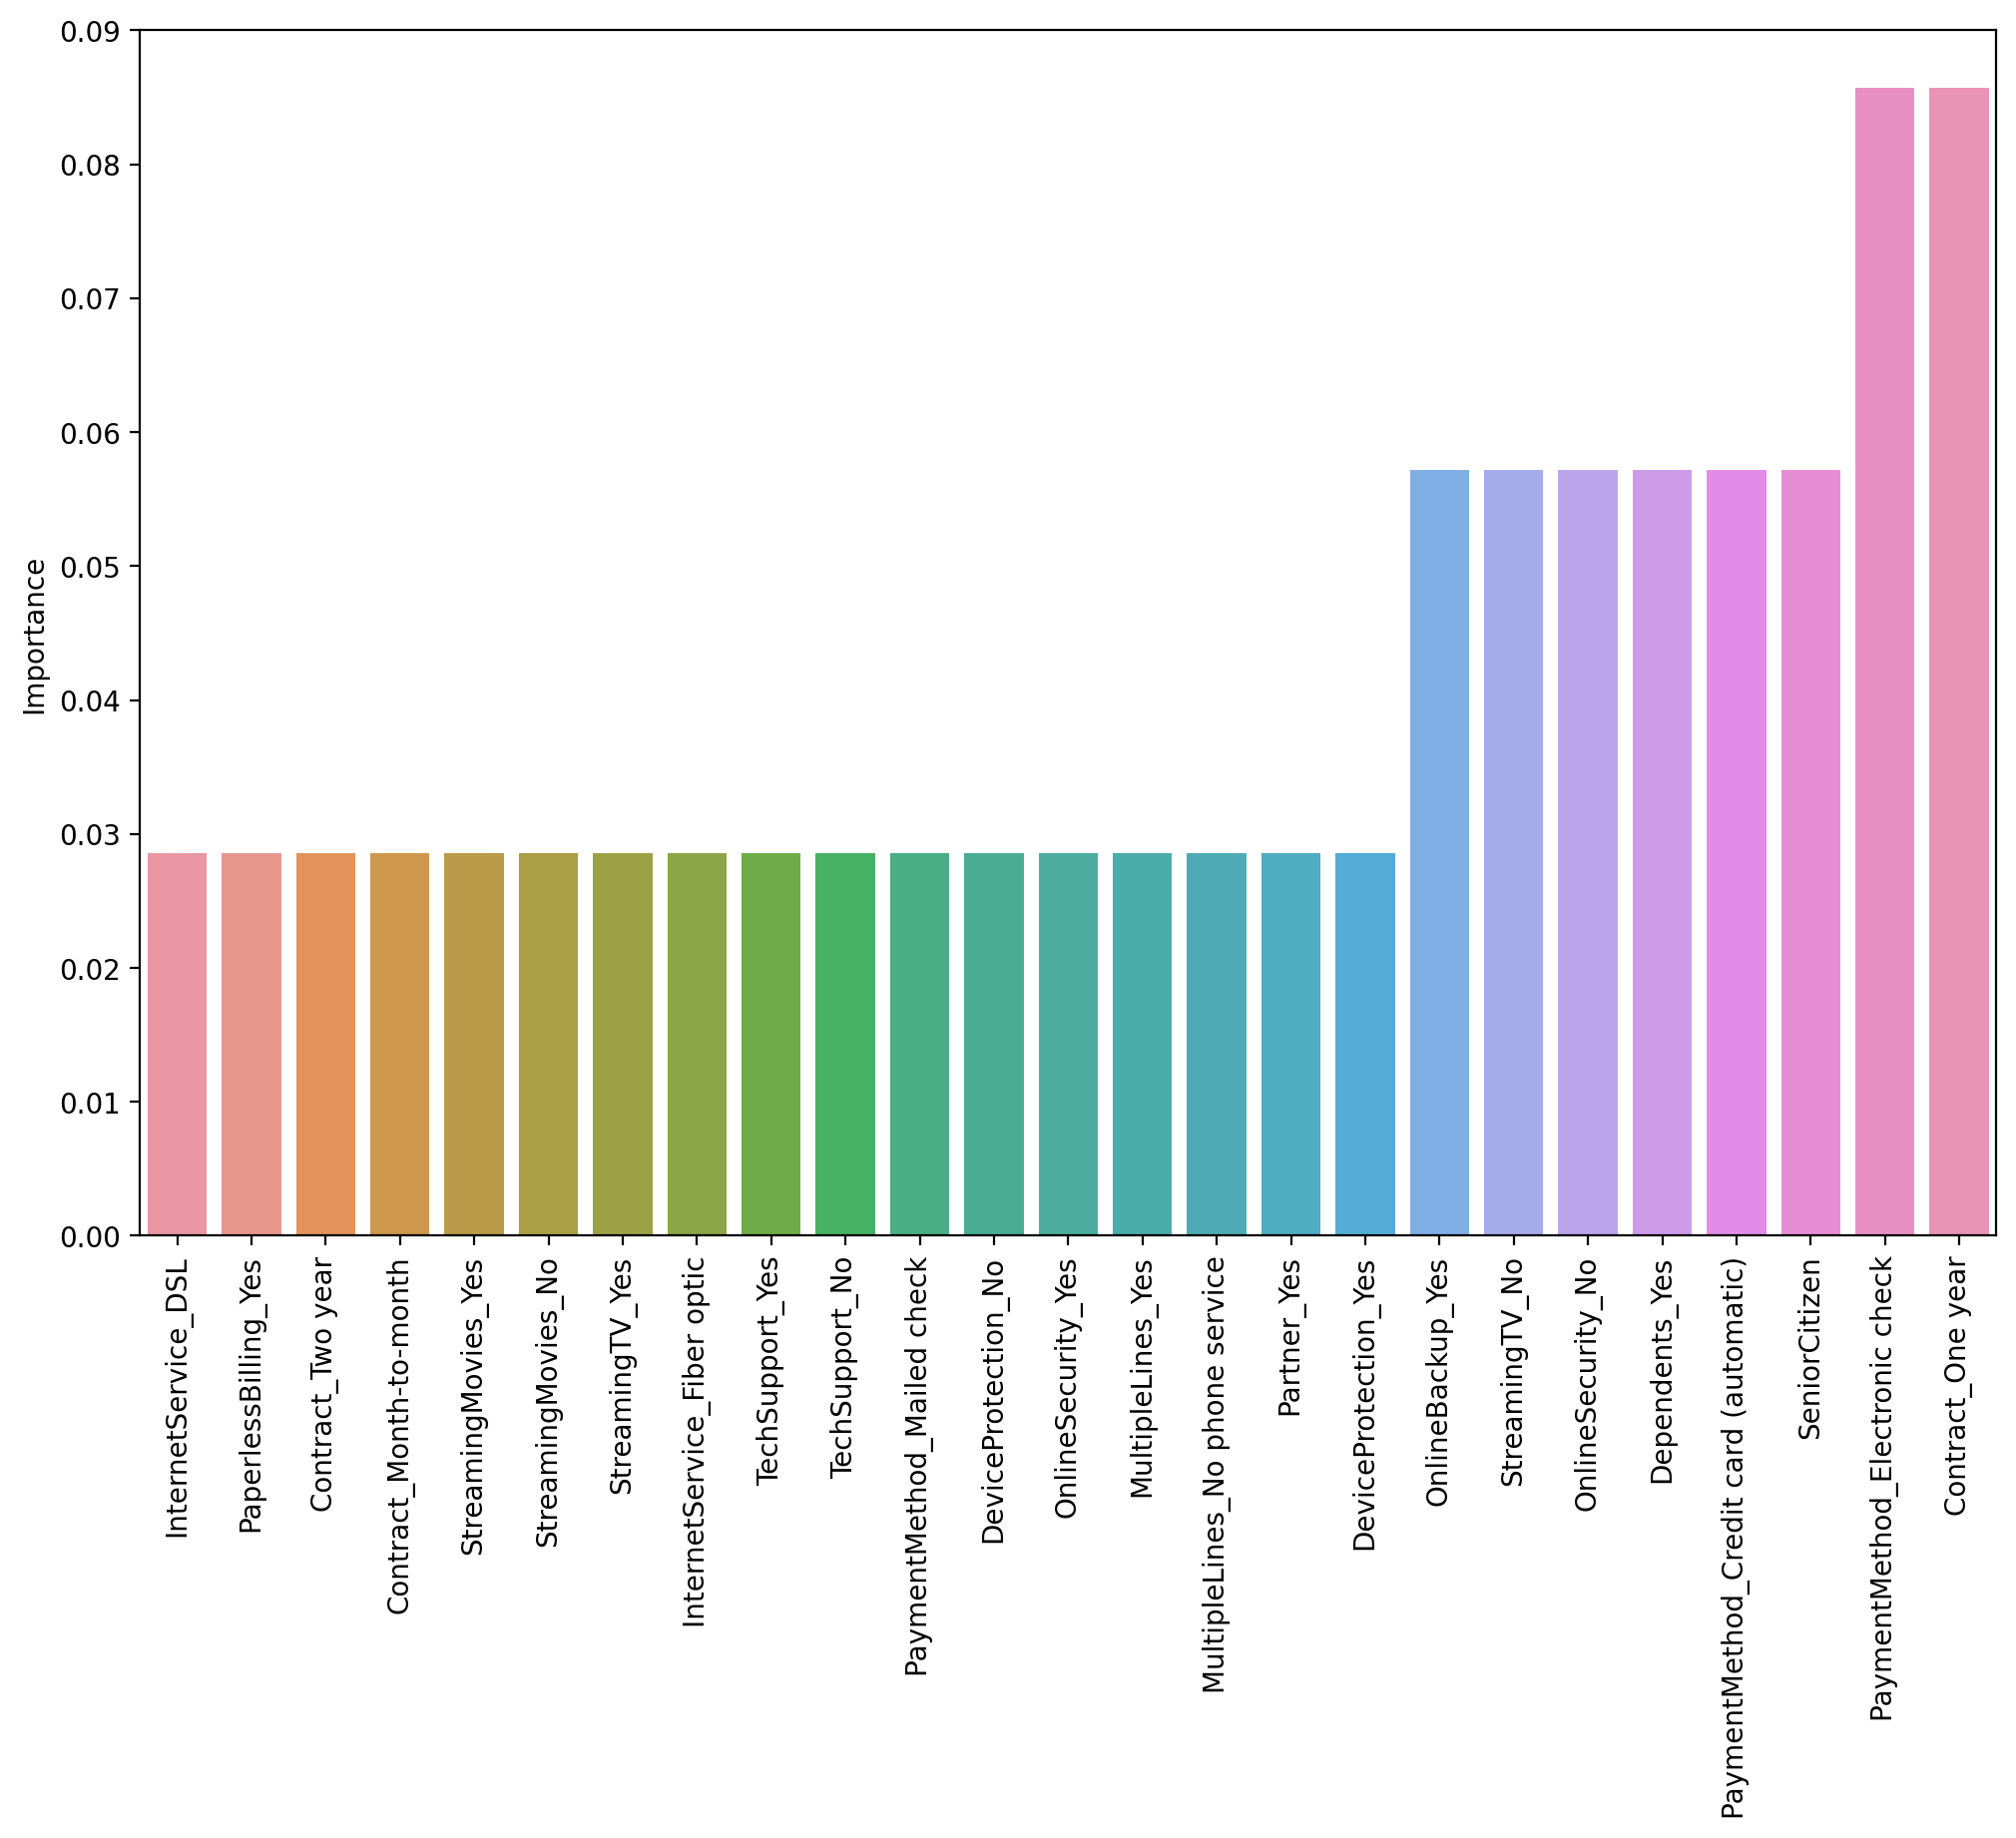

In [634]:
#Find important coefficients and their features from adaboost
features = pd.DataFrame(index=converted_X_train.columns, data=ada_boost_final.feature_importances_, columns=['Importance'])
important_features = features[features['Importance'] > 0].sort_values('Importance')
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=important_features, x=important_features.index, y='Importance')
plt.xticks(rotation=90);

# Gradient Boost Tree Application

In [635]:
#setting up data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
#scaling not needed but need to get dummy variables
converted_X_train, converted_X_test = scaling(X_train, X_test)

In [636]:
#trying different gradient boost tree hyperparameters
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators':[50,100],
              'loss': ['deviance', 'exponential'],
              'learning_rate': [0.05, 0.1, 0.15, 0.2],
              'max_depth': [3,4,5,6]}
grid_model_gradient_boost = GridSearchCV(estimator=estimator, param_grid=param_grid)
grid_model_gradient_boost.fit(converted_X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5, 6], 'n_estimators': [50, 100]})

Accuracy Score:
0.7962085308056872
              precision    recall  f1-score   support

          No       0.89      0.85      0.87       840
         Yes       0.50      0.60      0.54       215

    accuracy                           0.80      1055
   macro avg       0.70      0.72      0.71      1055
weighted avg       0.81      0.80      0.80      1055



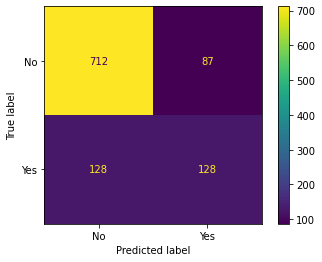

In [637]:
#results and predictions
predictions = grid_model_gradient_boost.predict(converted_X_test)
print('Accuracy Score:')
print(accuracy_score(predictions, y_test))
print(classification_report(predictions, y_test))
plot_confusion_matrix(grid_model_gradient_boost.best_estimator_, converted_X_test, y_test)

accuracy_result.append(accuracy_score(predictions, y_test))
model_name.append('Gradient Boost Model')

[6.96589822e-03 9.02527758e-04 7.11788073e-04 1.33759865e-03
 8.27352448e-03 2.01901497e-03 4.14461945e-03 2.83571973e-04
 5.39926307e-04 2.17508052e-04 2.59902765e-03 1.38878647e-03
 7.85695222e-02 0.00000000e+00 1.17026184e-02 1.85970586e-02
 0.00000000e+00 7.57715328e-03 8.83451347e-04 0.00000000e+00
 2.55444251e-03 3.51008685e-02 0.00000000e+00 1.24926649e-02
 1.91988486e-03 1.42086705e-01 0.00000000e+00 1.28158072e-03
 0.00000000e+00 4.62947338e-03 5.69152814e-04 0.00000000e+00
 1.13276894e-02 5.46117838e-01 4.29269053e-03 1.20783016e-02
 7.02666271e-03 6.70244661e-03 1.95497894e-03 6.58527906e-03
 5.59578281e-02 6.07916506e-04]


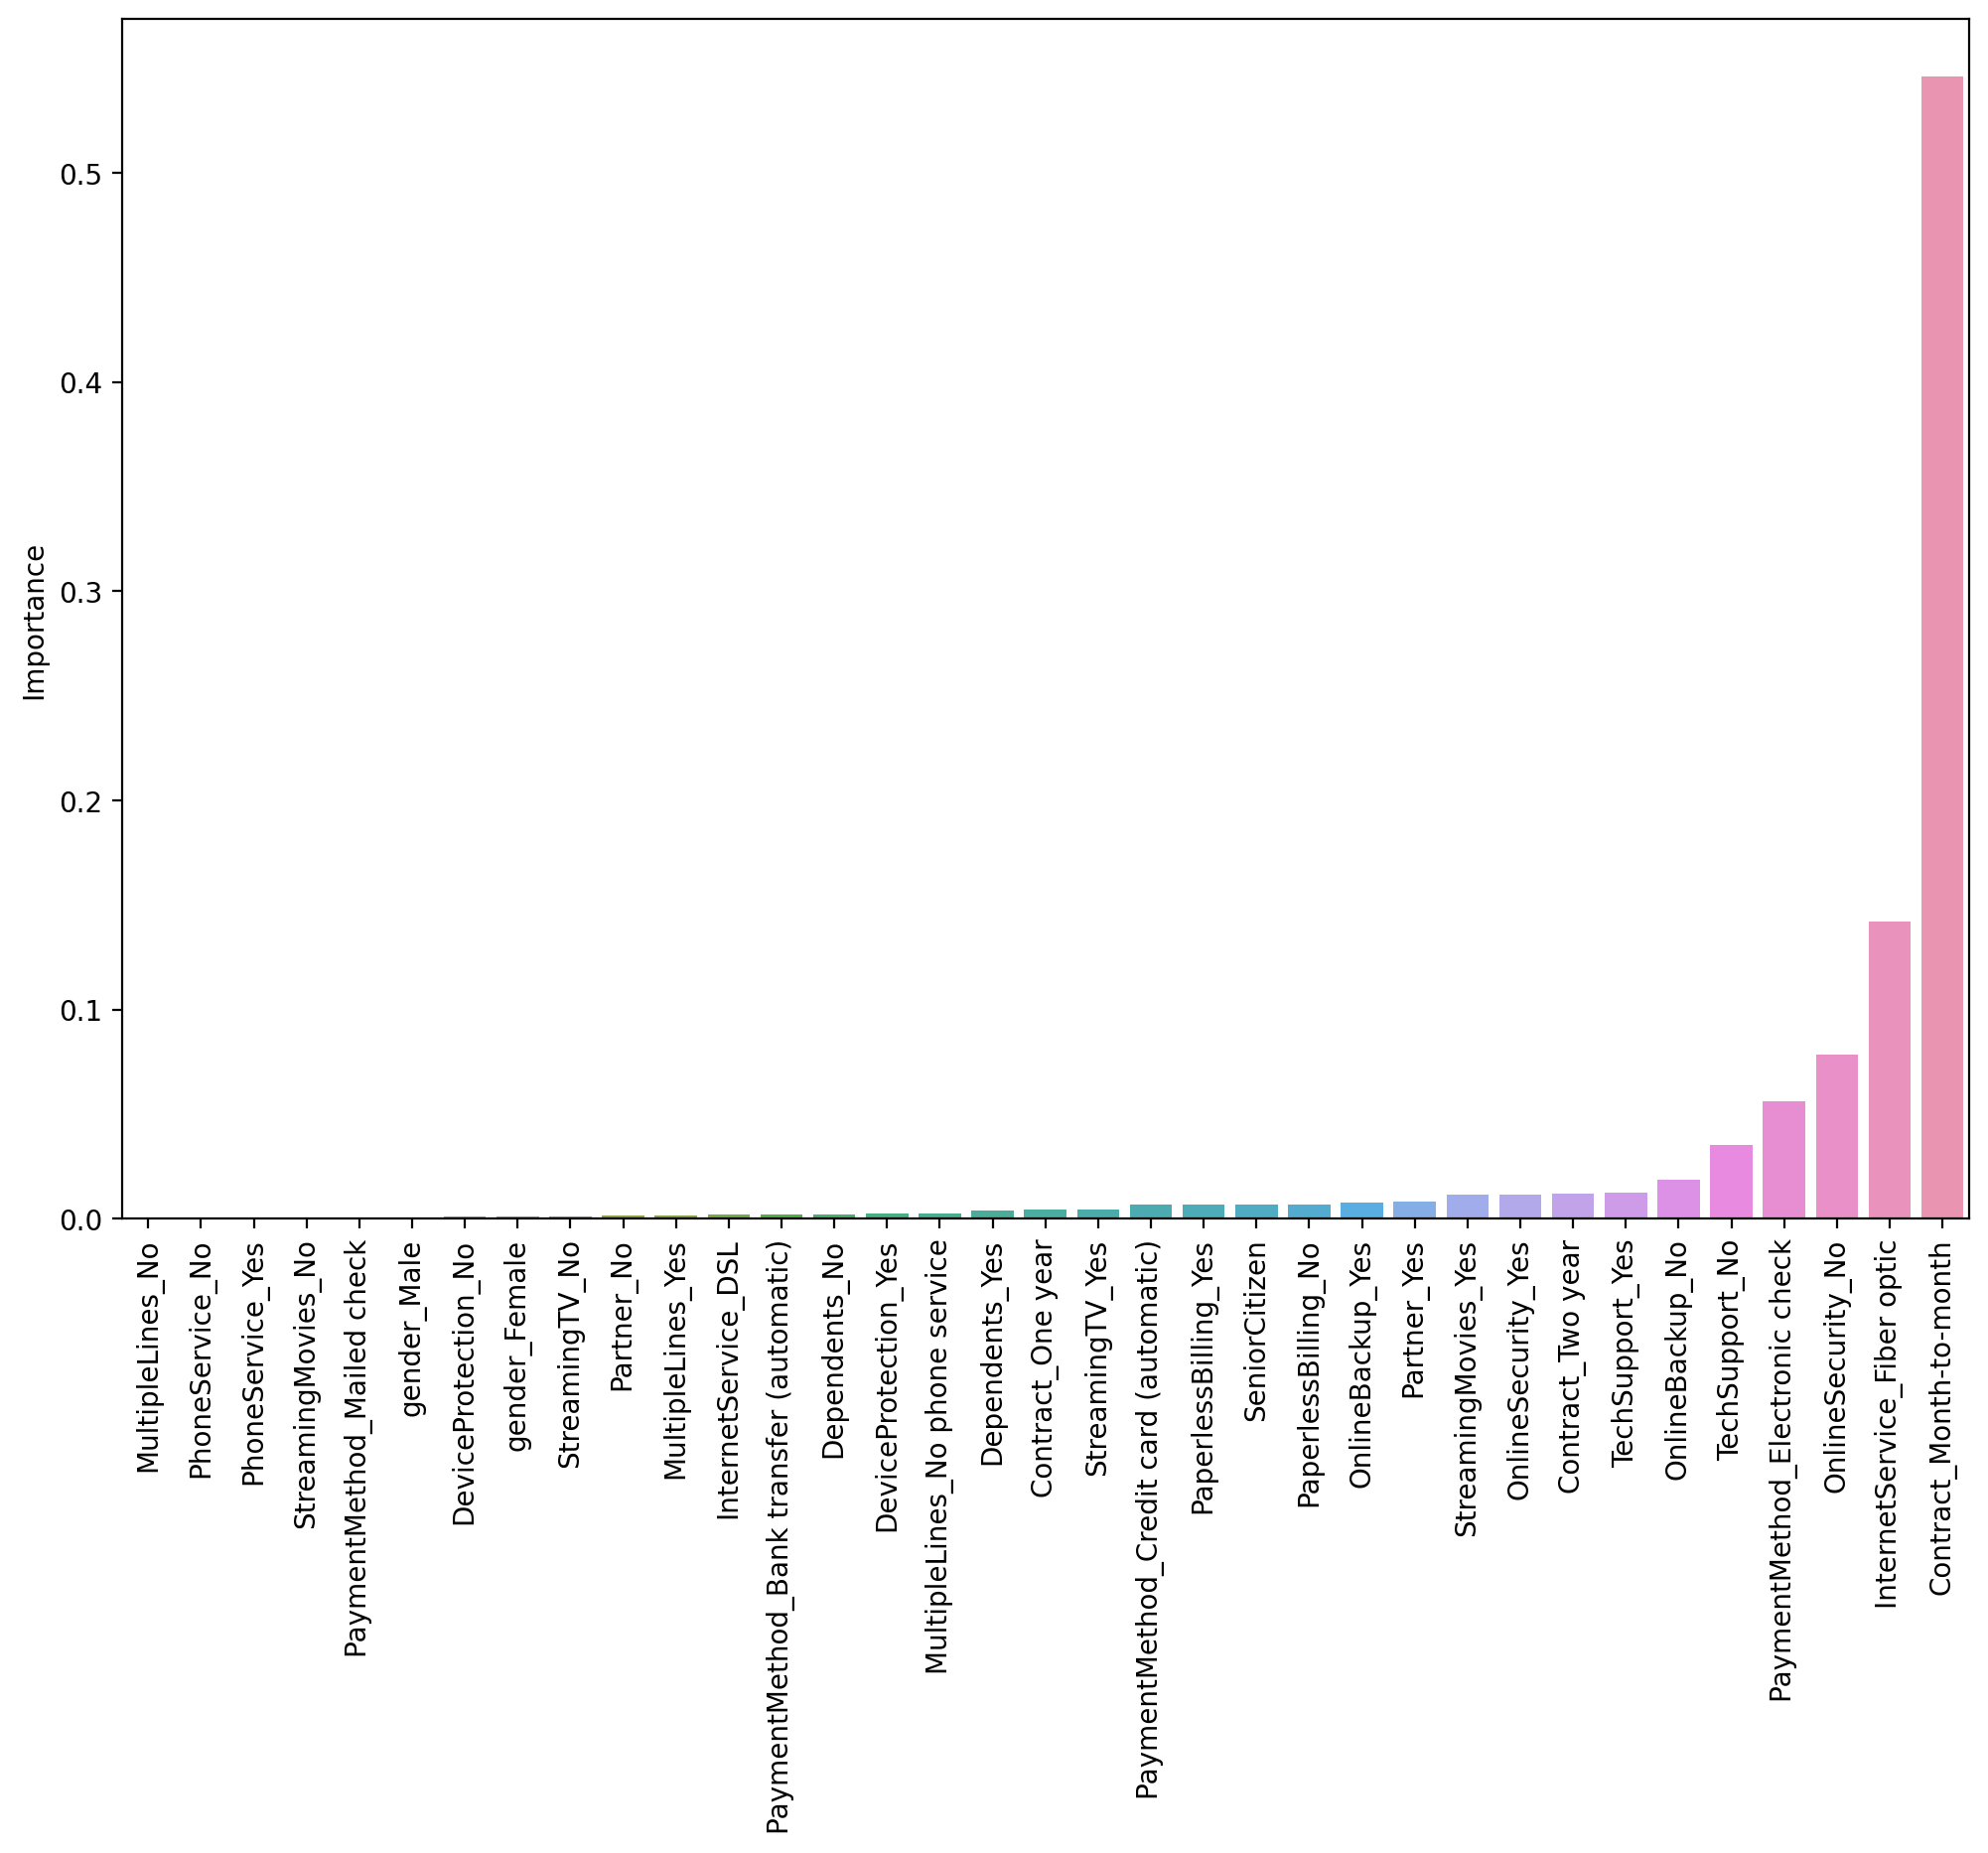

In [638]:
#organizing important features
print(grid_model_gradient_boost.best_estimator_.feature_importances_)
features = pd.DataFrame(index=converted_X_train.columns, data=grid_model_gradient_boost.best_estimator_.feature_importances_, columns=['Importance'])
important_features = features[features['Importance'] > 0].sort_values('Importance')
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=important_features, x=important_features.index, y='Importance')
plt.xticks(rotation=90);

In [639]:
#Reporting final accuracies in all models tested
data_tuples = list(zip(model_name,accuracy_result))
final_results = pd.DataFrame(data=data_tuples, columns=['Model Name', 'Accuracy Result'])
final_results.sort_values('Accuracy Result')[::-1]

Model Name  Accuracy Result
1   Logistic Regression         0.796928
0   Basic Decision Tree         0.796875
2   K-Nearest-Neighbors         0.796731
6  Gradient Boost Model         0.796209
3                   SVC         0.792614
5        AdaBoost Model         0.785782
4         Random Forest         0.759943